# Project 3 - Share Market Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Project Task - Week 1

    1. Check the stock symbols of the companies in Nasdaq 100 Market cap.xlsx. Only the relevant files in the NASDAQ_DATA   folder should be read.
    
    2. Append all files (imported in the previous step) that contain no more than 10 years of data. For this, you may use   your discretion.
    
    3. Read Nasdaq 100 market cap.xlsx and nasdaq100_metrics_ratios.xlsx.
    
    4. Collate the two files imported in the previous step to include the fields Market cap and Last sale in addition to the various metrics and ratios already present in nasdaq100_metrics_ratios.xlsx
    
    5. Identify the variables whose variance is less than .005 (as these do not contribute to model building), and eliminate those variables
    
    6. Delete the variables in nasdaq100_metrics_ratios.xlsx where 30% or more of the values are missing
    
    7. Perform missing value imputation for variables with less than 30% missing values by considering the company's sector
    
    8. Analyze the effect of COVID on stock prices in detail, create visuals to support the insights, and address the          following:
        
        a. Which sectors and companies saw the greatest impact, and which ones saw the least? You may use growth or         degrowth as a measure of impact and may perform week over week, month over month (Mom), quarter over quarter (QoQ), or  year over year (YoY) analysis as appropriate.
        b. Which sector and company experienced the fastest and slowest recoveries?



In [2]:
market = pd.read_excel('Nasdaq 100 Market cap.xlsx')

In [3]:
market

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change  Percentage Change  
0        $2.00             0.0134  
1        $0.26             0.0022  
2        $4.59             0.0145  
3        $2.23             0.0154  
4        $0.13            -0.0005  
..         ...                ...  
97       $0.52             0.0150  
98       $6.54             0.0442  
99       $0.93             0.0151  
100      $2.24             0.0278  
101      $7.87             0.0529  

[102 rows x 6 columns]

In [4]:
metrics = pd.read_excel('nasdaq100_metrics_ratios.xlsx')

In [5]:
metrics

symbol                    company                  sector  \
0     AAPL                 Apple Inc.  Information Technology   
1     ABNB                     Airbnb  Consumer Discretionary   
2     ADBE                 Adobe Inc.  Information Technology   
3      ADI             Analog Devices  Information Technology   
4      ADP                        ADP  Information Technology   
..     ...                        ...                     ...   
97     WBA   Walgreens Boots Alliance        Consumer Staples   
98    WDAY              Workday, Inc.  Information Technology   
99     XEL                Xcel Energy               Utilities   
100     ZM  Zoom Video Communications  Information Technology   
101     ZS                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals                 0.66   
1            Internet & Direct Marketing Retail                  NaN   
2                          Application Software                 0.54   
3                                Semiconductors                 0.36   
4         Data Processing & Outsourced Services                  NaN   
..                                          ...                  ...   
97                                  Drug Retail                 1.71   
98                         Application Software                  NaN   
99                              Multi-Utilities                 0.27   
100                        Application Software                  NaN   
101                        Application Software                  NaN   

     asset_turnover_2018  asset_turnover_2019  asset_turnover_2020  \
0                   0.72                 0.74                 0.83   
1                   0.55                 0.64                 0.36   
2                   0.54                 0.57                 0.57   
3                   0.30                 0.29                 0.26   
4                   0.34                 0.34                 0.35   
..                   ...                  ...                  ...   
97                  1.96                 1.77                 1.58   
98                  0.52                 0.54                 0.59   
99                  0.26                 0.24                 0.22   
100                 0.70                 1.16                 0.76   
101                 0.60                 0.58                 0.35   

     asset_turnover_2021  asset_turnover_2022  ...  yoy_eps_growth_2021  \
0                   1.08                  NaN  ...                71.04   
1                   0.50                  NaN  ...                96.46   
2                   0.61                  NaN  ...                -7.48   
3                   0.20                  NaN  ...                 5.49   
4                   0.33                 0.29  ...                 6.49   
..                   ...                  ...  ...                  ...   
97                  1.57                  NaN  ...               463.46   
98                  0.56                 0.54  ...                43.87   
99                  0.24                  NaN  ...                 6.09   
100                 0.81                 0.64  ...                  NaN   
101                 0.33                 0.43  ...              -116.85   

     yoy_eps_growth_2022  yoy_eps_growth_latest  yoy_revenue_growth_2017  \
0                    NaN                  -7.69                    11.34   
1                    NaN                 609.09                      NaN   
2                    NaN                  -3.97                    25.51   
3                    NaN                   6.67                    36.64   
4                  15.32                  19.05                      NaN   
..                   ...                    ...                      ...   
97                   NaN                 -76.09                     1.91   
98      

In [6]:
metrics.rename(columns = {'symbol':'Symbol'},inplace=True)

In [7]:
df = pd.merge(market,metrics,on='Symbol',how='inner')

In [8]:
df

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change  Percentage Change                    company  \
0        $2.00             0.0134                 Apple Inc.   
1        $0.26             0.0022                     Airbnb   
2        $4.59             0.0145                 Adobe Inc.   
3        $2.23             0.0154             Analog Devices   
4        $0.13            -0.0005                        ADP   
..         ...                ...                        ...   
97       $0.52             0.0150   Walgreens Boots Alliance   
98       $6.54             0.0442              Workday, Inc.   
99       $0.93             0.0151                Xcel Energy   
100      $2.24             0.0278  Zoom Video Communications   
101      $7.87             0.0529                    Zscaler   

                     sector                                   subsector  \
0    Information Technology  Technology Hardware, Storage & Peripherals   
1    Consumer Discretionary          Internet & Direct Marketing Retail   
2    Information Technology                        Application Software   
3    Information Technology                              Semiconductors   
4    Information Technology       Data Processing & Outsourced Services   
..                      ...                                         ...   
97         Consumer Staples                                 Drug Retail   
98   Information Technology                        Application Software   
99                Utilities                             Multi-Utilities   
100  Information Technology                        Application Software   
101  Information Technology                        Application Software   

     asset_turnover_2017  ...  yoy_eps_growth_2021  yoy_eps_growth_2022  \
0                   0.66  ...                71.04                  NaN   
1                    NaN  ...                96.46                  NaN   
2                   0.54  ...                -7.48                  NaN   
3                   0.36  ...                 5.49                  NaN   
4                    NaN  ...                 6.49                15.32   
..                   ...  ...                  ...                  ...   
97                  1.71  ...               463.46                  NaN   
98                   NaN  ...                43.87               110.08   
99                  0.27  ...                 6.09                  NaN   
100                  NaN  ...                  NaN               100.00   
101                  NaN  ...              -116.85               -43.52   

     yoy_eps_growth_latest  yoy_revenue_growth_2017  yoy_revenue_growth_2018  \
0                    -7.69                    11.34                    21.69   
1                   609.09                      NaN                    40.08   
2                    -3.97                    25.51                    24.45   
3                     6.67                    36.64                    10.91   
4                    19.05                      NaN                     8.65   
..                     ...                      ...                      ...   
97      

In [9]:
variances = df.var()

C:\Users\Vinosh\AppData\Local\Temp\ipykernel_12216\529193874.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = df.var()


In [10]:
less_var = variances < 0.005

In [11]:
less_va_col = variances.index[less_var]

In [12]:
less_va_col

Index(['Percentage Change', 'capex_to_revenue_2022',
       'inventory_to_revenue_2017', 'inventory_to_revenue_2018',
       'inventory_to_revenue_2022'],
      dtype='object')

In [13]:
df.drop(less_va_col,axis=1,inplace=True)

In [14]:
df

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change                    company                  sector  \
0        $2.00                 Apple Inc.  Information Technology   
1        $0.26                     Airbnb  Consumer Discretionary   
2        $4.59                 Adobe Inc.  Information Technology   
3        $2.23             Analog Devices  Information Technology   
4        $0.13                        ADP  Information Technology   
..         ...                        ...                     ...   
97       $0.52   Walgreens Boots Alliance        Consumer Staples   
98       $6.54              Workday, Inc.  Information Technology   
99       $0.93                Xcel Energy               Utilities   
100      $2.24  Zoom Video Communications  Information Technology   
101      $7.87                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals                 0.66   
1            Internet & Direct Marketing Retail                  NaN   
2                          Application Software                 0.54   
3                                Semiconductors                 0.36   
4         Data Processing & Outsourced Services                  NaN   
..                                          ...                  ...   
97                                  Drug Retail                 1.71   
98                         Application Software                  NaN   
99                              Multi-Utilities                 0.27   
100                        Application Software                  NaN   
101                        Application Software                  NaN   

     asset_turnover_2018  ...  yoy_eps_growth_2021  yoy_eps_growth_2022  \
0                   0.72  ...                71.04                  NaN   
1                   0.55  ...                96.46                  NaN   
2                   0.54  ...                -7.48                  NaN   
3                   0.30  ...                 5.49                  NaN   
4                   0.34  ...                 6.49                15.32   
..                   ...  ...                  ...                  ...   
97                  1.96  ...               463.46                  NaN   
98                  0.52  ...                43.87               110.08   
99                  0.26  ...                 6.09                  NaN   
100                 0.70  ...                  NaN               100.00   
101                 0.60  ...              -116.85               -43.52   

     yoy_eps_growth_latest  yoy_revenue_growth_2017  yoy_revenue_growth_2018  \
0                    -7.69                    11.34                    21.69   
1                   609.09                      NaN                    40.08   
2                    -3.97                    25.51                    24.45   
3                     6.67                    36.64                    10.91   
4                    19.05                      NaN                     8.65   
..                     ...                      ...             

In [15]:
missing_value = df.isnull().sum() / len(df) *100

In [16]:
missing_value_condition = missing_value > 30

In [17]:
missing_value_col = missing_value.index[missing_value_condition]

In [18]:
missing_value_col

Index(['asset_turnover_2022', 'buyback_yield_2017', 'buyback_yield_2022',
       'cash_ratio_2022', 'cash_to_debt_2017', 'cash_to_debt_2022',
       'cogs_to_revenue_2022', 'mscore_2017', 'mscore_2022', 'zscore_2017',
       'zscore_2022', 'current_ratio_2022', 'days_inventory_2017',
       'days_inventory_2018', 'days_inventory_2019', 'days_inventory_2020',
       'days_inventory_2021', 'days_inventory_2022', 'debt_to_equity_2017',
       'debt_to_equity_2022', 'debt_to_assets_2017', 'debt_to_assets_2022',
       'debt_to_ebitda_2017', 'debt_to_ebitda_2022', 'debt_to_revenue_2017',
       'debt_to_revenue_2022', 'e10_2017', 'e10_2022',
       'effective_interest_rate_2017', 'effective_interest_rate_2022',
       'equity_to_assets_2022', 'enterprise_value_to_ebit_2017',
       'enterprise_value_to_ebit_2022', 'enterprise_value_to_ebitda_2017',
       'enterprise_value_to_ebitda_2022', 'enterprise_value_to_revenue_2017',
       'enterprise_value_to_revenue_2022', 'earning_yield_greenbla

In [19]:
missing_value_col.shape

(80,)

In [20]:
df.drop(missing_value_col,axis=1,inplace=True)

In [21]:
df

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change                    company                  sector  \
0        $2.00                 Apple Inc.  Information Technology   
1        $0.26                     Airbnb  Consumer Discretionary   
2        $4.59                 Adobe Inc.  Information Technology   
3        $2.23             Analog Devices  Information Technology   
4        $0.13                        ADP  Information Technology   
..         ...                        ...                     ...   
97       $0.52   Walgreens Boots Alliance        Consumer Staples   
98       $6.54              Workday, Inc.  Information Technology   
99       $0.93                Xcel Energy               Utilities   
100      $2.24  Zoom Video Communications  Information Technology   
101      $7.87                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals                 0.66   
1            Internet & Direct Marketing Retail                  NaN   
2                          Application Software                 0.54   
3                                Semiconductors                 0.36   
4         Data Processing & Outsourced Services                  NaN   
..                                          ...                  ...   
97                                  Drug Retail                 1.71   
98                         Application Software                  NaN   
99                              Multi-Utilities                 0.27   
100                        Application Software                  NaN   
101                        Application Software                  NaN   

     asset_turnover_2018  ...  yoy_eps_growth_2019  yoy_eps_growth_2020  \
0                   0.72  ...                -0.34                10.44   
1                   0.55  ...                  NaN                  NaN   
2                   0.54  ...                15.38                80.50   
3                   0.30  ...                -8.75               -10.14   
4                   0.34  ...                23.29                 8.78   
..                   ...  ...                  ...                  ...   
97                  1.96  ...               -14.65               -87.94   
98                  0.52  ...               -24.52                -9.84   
99                  0.26  ...                 6.88                 5.68   
100                 0.70  ...               185.71               200.00   
101                 0.60  ...                63.49              -286.96   

     yoy_eps_growth_2021  yoy_eps_growth_latest  yoy_revenue_growth_2017  \
0                  71.04                  -7.69                    11.34   
1                  96.46                 609.09                      NaN   
2                  -7.48                  -3.97                    25.51   
3                   5.49                   6.67                    36.64   
4                   6.49                  19.05                      NaN   
..                   ...                    ...                      ...   
97          

In [22]:
df.fillna(df.mean(),inplace=True)

C:\Users\Vinosh\AppData\Local\Temp\ipykernel_12216\2085774198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [23]:
df

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change                    company                  sector  \
0        $2.00                 Apple Inc.  Information Technology   
1        $0.26                     Airbnb  Consumer Discretionary   
2        $4.59                 Adobe Inc.  Information Technology   
3        $2.23             Analog Devices  Information Technology   
4        $0.13                        ADP  Information Technology   
..         ...                        ...                     ...   
97       $0.52   Walgreens Boots Alliance        Consumer Staples   
98       $6.54              Workday, Inc.  Information Technology   
99       $0.93                Xcel Energy               Utilities   
100      $2.24  Zoom Video Communications  Information Technology   
101      $7.87                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals             0.660000   
1            Internet & Direct Marketing Retail             0.724932   
2                          Application Software             0.540000   
3                                Semiconductors             0.360000   
4         Data Processing & Outsourced Services             0.724932   
..                                          ...                  ...   
97                                  Drug Retail             1.710000   
98                         Application Software             0.724932   
99                              Multi-Utilities             0.270000   
100                        Application Software             0.724932   
101                        Application Software             0.724932   

     asset_turnover_2018  ...  yoy_eps_growth_2019  yoy_eps_growth_2020  \
0                   0.72  ...            -0.340000            10.440000   
1                   0.55  ...             8.557216            37.838687   
2                   0.54  ...            15.380000            80.500000   
3                   0.30  ...            -8.750000           -10.140000   
4                   0.34  ...            23.290000             8.780000   
..                   ...  ...                  ...                  ...   
97                  1.96  ...           -14.650000           -87.940000   
98                  0.52  ...           -24.520000            -9.840000   
99                  0.26  ...             6.880000             5.680000   
100                 0.70  ...           185.710000           200.000000   
101                 0.60  ...            63.490000          -286.960000   

     yoy_eps_growth_2021  yoy_eps_growth_latest  yoy_revenue_growth_2017  \
0              71.040000                  -7.69                11.340000   
1              96.460000                 609.09                19.277917   
2              -7.480000                  -3.97                25.510000   
3               5.490000                   6.67                36.640000   
4               6.490000                  19.05                19.277917   
..                   ...                    ...                      ...   
97          

In [24]:
df.isnull().sum()

Symbol                       0
Name                         0
Market Cap                   0
Last Sale                    0
Net Change                   0
                            ..
yoy_revenue_growth_2018      0
yoy_revenue_growth_2019      0
yoy_revenue_growth_2020      0
yoy_revenue_growth_2021      0
yoy_revenue_growth_latest    0
Length: 203, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Columns: 203 entries, Symbol to yoy_revenue_growth_latest
dtypes: float64(193), int64(3), object(7)
memory usage: 162.6+ KB


In [26]:
missing_value_corrected = df.isnull().sum() / len(df) *100

In [27]:
check_missing_after_remove = missing_value_corrected > 1

In [28]:
missing_value_col_corrected = missing_value_corrected.index[check_missing_after_remove]

In [29]:
missing_value_col_corrected

Index([], dtype='object')

In [30]:
df.columns

Index(['Symbol', 'Name', 'Market Cap', 'Last Sale', 'Net Change', 'company',
       'sector', 'subsector', 'asset_turnover_2017', 'asset_turnover_2018',
       ...
       'yoy_eps_growth_2019', 'yoy_eps_growth_2020', 'yoy_eps_growth_2021',
       'yoy_eps_growth_latest', 'yoy_revenue_growth_2017',
       'yoy_revenue_growth_2018', 'yoy_revenue_growth_2019',
       'yoy_revenue_growth_2020', 'yoy_revenue_growth_2021',
       'yoy_revenue_growth_latest'],
      dtype='object', length=203)

In [31]:
pd.set_option('display.max_columns', 250)

In [32]:
df

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change                    company                  sector  \
0        $2.00                 Apple Inc.  Information Technology   
1        $0.26                     Airbnb  Consumer Discretionary   
2        $4.59                 Adobe Inc.  Information Technology   
3        $2.23             Analog Devices  Information Technology   
4        $0.13                        ADP  Information Technology   
..         ...                        ...                     ...   
97       $0.52   Walgreens Boots Alliance        Consumer Staples   
98       $6.54              Workday, Inc.  Information Technology   
99       $0.93                Xcel Energy               Utilities   
100      $2.24  Zoom Video Communications  Information Technology   
101      $7.87                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals             0.660000   
1            Internet & Direct Marketing Retail             0.724932   
2                          Application Software             0.540000   
3                                Semiconductors             0.360000   
4         Data Processing & Outsourced Services             0.724932   
..                                          ...                  ...   
97                                  Drug Retail             1.710000   
98                         Application Software             0.724932   
99                              Multi-Utilities             0.270000   
100                        Application Software             0.724932   
101                        Application Software             0.724932   

     asset_turnover_2018  asset_turnover_2019  asset_turnover_2020  \
0                   0.72                 0.74                 0.83   
1                   0.55                 0.64                 0.36   
2                   0.54                 0.57                 0.57   
3                   0.30                 0.29                 0.26   
4                   0.34                 0.34                 0.35   
..                   ...                  ...                  ...   
97                  1.96                 1.77                 1.58   
98                  0.52                 0.54                 0.59   
99                  0.26                 0.24                 0.22   
100                 0.70                 1.16                 0.76   
101                 0.60                 0.58                 0.35   

     asset_turnover_2021  asset_turnover_latest  buyback_yield_2018  \
0                   1.08                   0.24            6.710000   
1                   0.50                   0.12            2.840964   
2                   0.61                   0.17            1.520000   
3                   0.20                   0.06            0.730000   
4                   0.33                   0.06            1.680000   
..                   ...                    ...                 ...   
97                  1.57                   0.35            8.010000   
98                  0.56            

#### The impact of COVID has occurred during the year 2020

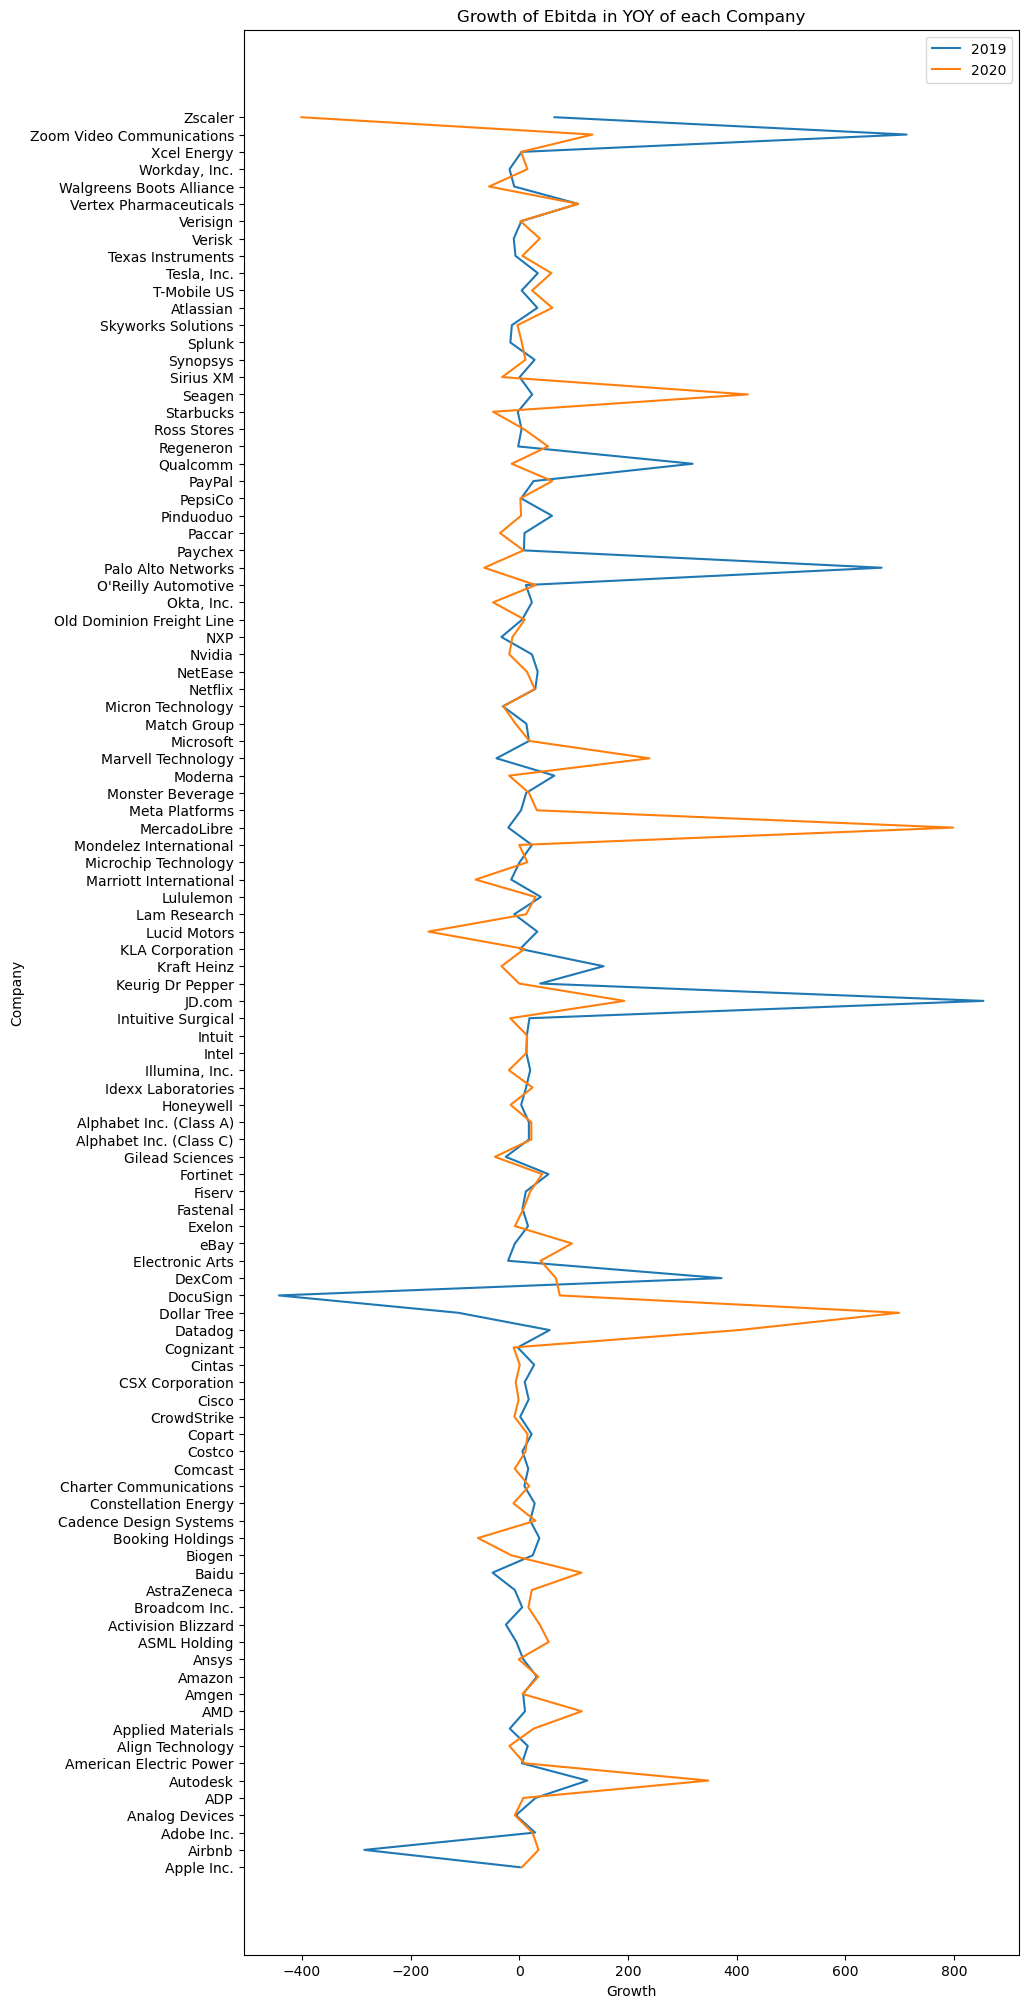

In [33]:
fig, ax = plt.subplots(figsize=(10,25))
ax.plot(df['yoy_ebitda_growth_2019'],df['company'],label='2019')
ax.plot(df['yoy_ebitda_growth_2020'],df['company'],label='2020')

ax.legend()
ax.set_xlabel('Growth')
ax.set_ylabel('Company')
ax.set_title('Growth of Ebitda in YOY of each Company')

plt.show()

#### The greatest impact in Ebitda due to COVID occured for the companies:
        Zscaler, Zoom Video Communications, JD.com and Palo Alto Networks, DocuSign, Dollar Tree, MercadoLibre

#### The Lowest impact in Ebitda due to COVID occured for the companies :
        Align Technology, ADP, Comcast, CrowdStrike, Copart, Cisco, Broadcom Inc., AstraZeneca, Amazon, Charter                  Communications, Costco, Texas Instruments, Tesla Inc., etc

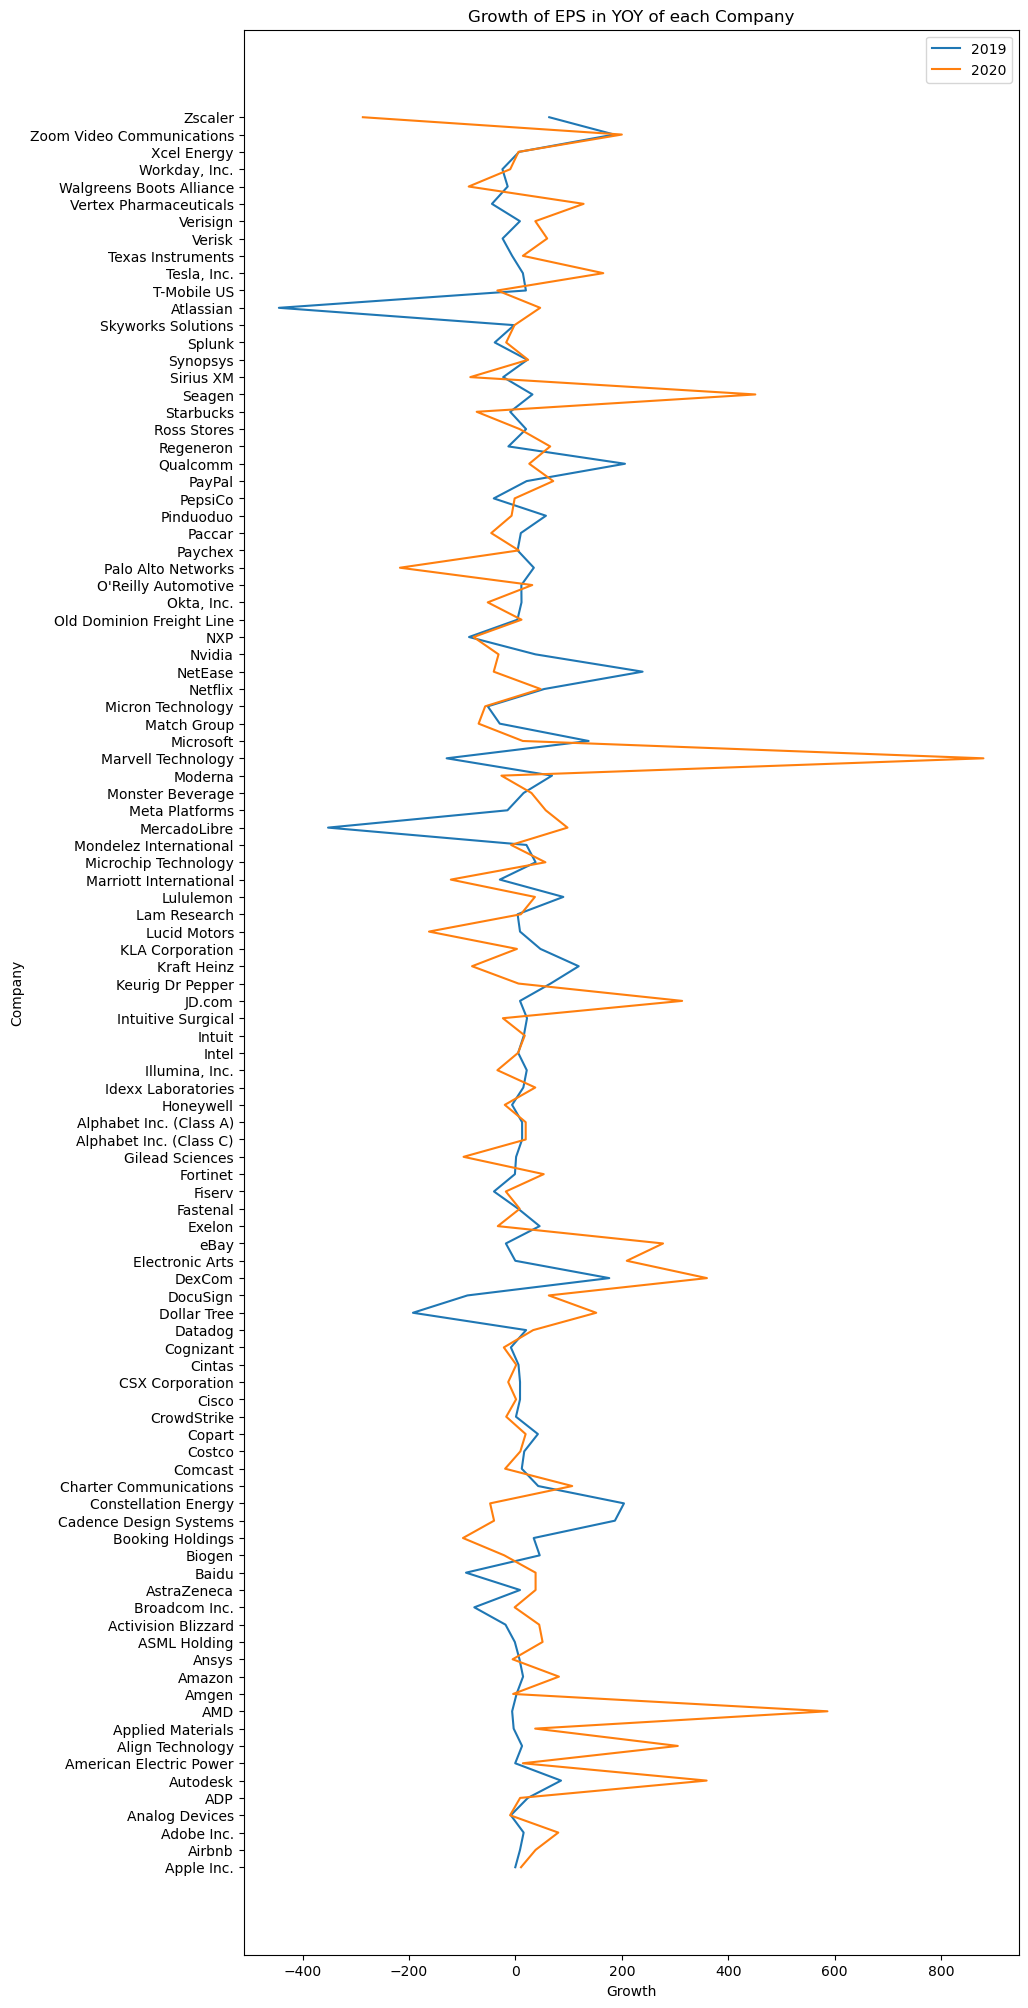

In [34]:
fig, ax = plt.subplots(figsize=(10,25))
ax.plot(df['yoy_eps_growth_2019'],df['company'],label='2019')
ax.plot(df['yoy_eps_growth_2020'],df['company'],label='2020')

ax.legend()
ax.set_xlabel('Growth')
ax.set_ylabel('Company')
ax.set_title('Growth of EPS in YOY of each Company')

plt.show()

#### The greatest impact in EPS due to COVID occured for the companies:
        Zscaler, Marvell Technology, AMD

#### The Lowest impact in EPS due to COVID occured for the companies :
        Match Group, ADP, Costco, PepsiCo, Apple Inc., American Electric Power, Splunk, Workday Inc. ,etc

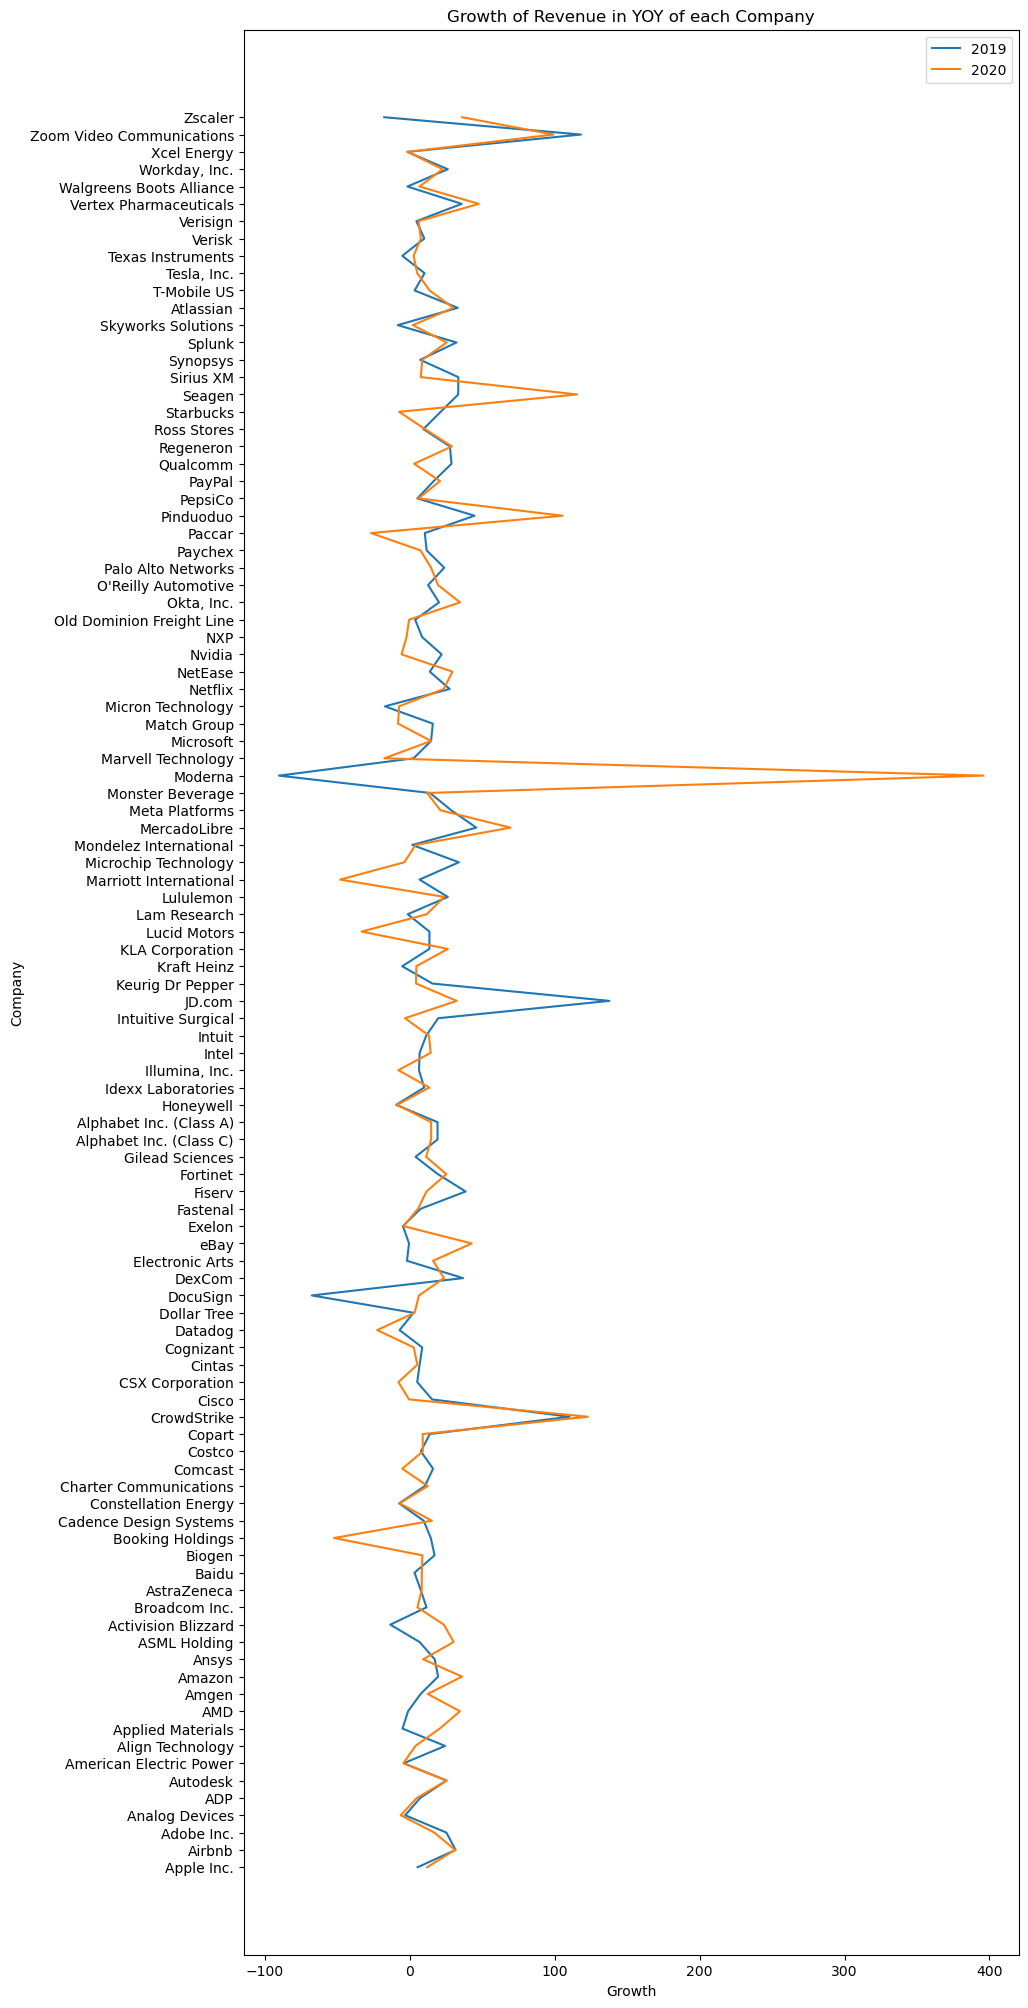

In [35]:
fig, ax = plt.subplots(figsize=(10,25))
ax.plot(df['yoy_revenue_growth_2019'],df['company'],label='2019')
ax.plot(df['yoy_revenue_growth_2020'],df['company'],label='2020')

ax.legend()
ax.set_xlabel('Growth')
ax.set_ylabel('Company')
ax.set_title('Growth of Revenue in YOY of each Company')

plt.show()

#### The greatest impact in Reveune due to COVID occured for the companies:
        Zscaler, JD.com, Moderna

#### The Lowest impact in Reveune due to COVID occured for the companies :
        Verisk, Adobe Inc., Ansys, Tesla Inc., Splunk, Apple Inc., Baidu, Gilead Sciences, Intel, T-Mobile US, etc

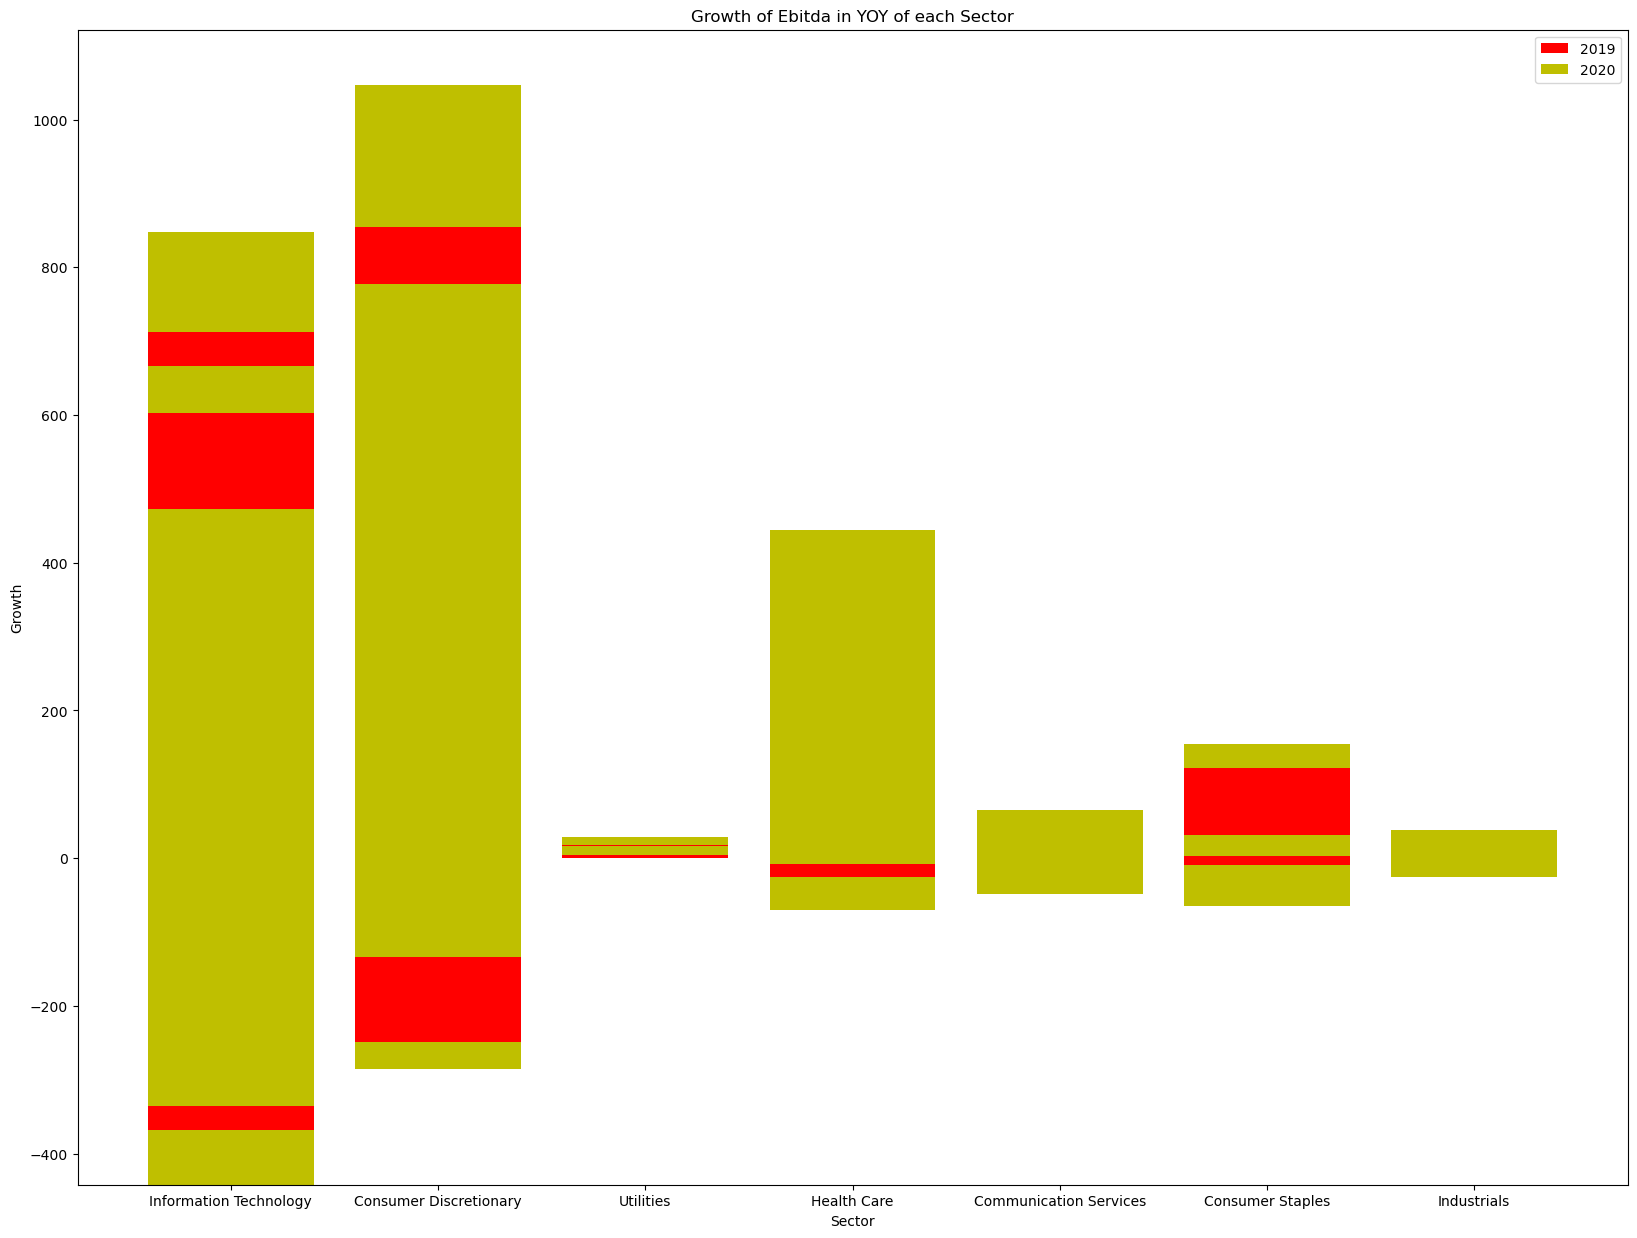

In [36]:
plt.figure(figsize=(20,15))
plt.bar(df['sector'],df['yoy_ebitda_growth_2019'],color='r',label='2019')
plt.bar(df['sector'],df['yoy_ebitda_growth_2020'],bottom=df['yoy_ebitda_growth_2019'],color='y',label='2020')
plt.xlabel('Sector')
plt.ylabel('Growth')
plt.title('Growth of Ebitda in YOY of each Sector')
plt.legend()
plt.show()

#### The greatest impact in Editda due to COVID occured for the Sector:
        Information Technology, Consumer Disretionary

#### The Lowest impact in Editda due to COVID occured for the companies :
        Utilities

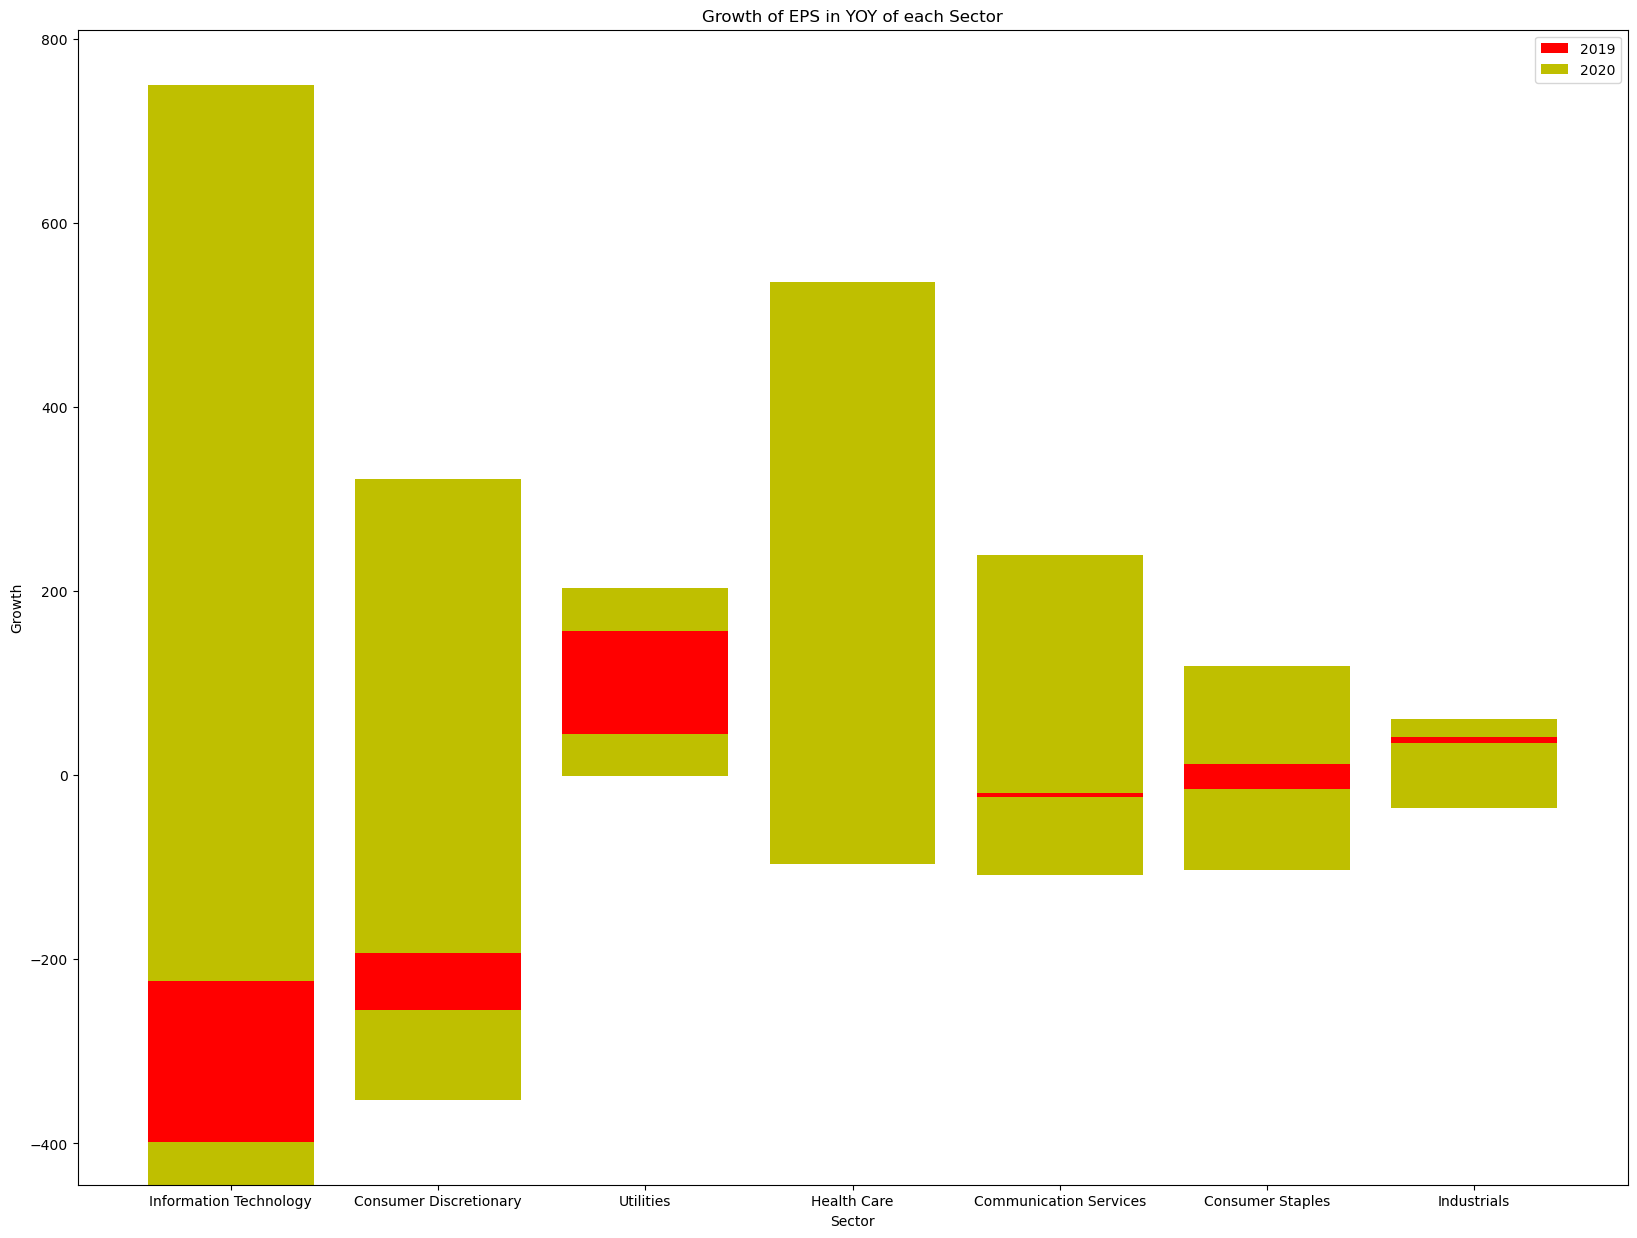

In [37]:
plt.figure(figsize=(20,15))
plt.bar(df['sector'],df['yoy_eps_growth_2019'],color='r',label='2019')
plt.bar(df['sector'],df['yoy_eps_growth_2020'],bottom=df['yoy_eps_growth_2019'],color='y',label='2020')
plt.xlabel('Sector')
plt.ylabel('Growth')
plt.title('Growth of EPS in YOY of each Sector')
plt.legend()
plt.show()

#### The greatest impact in EPS due to COVID occured for the Sector:
        Information Technology, Consumer Disretionary

#### The lowest impact in EPS due to COVID occured for the Sector:
        Industries, Utilities

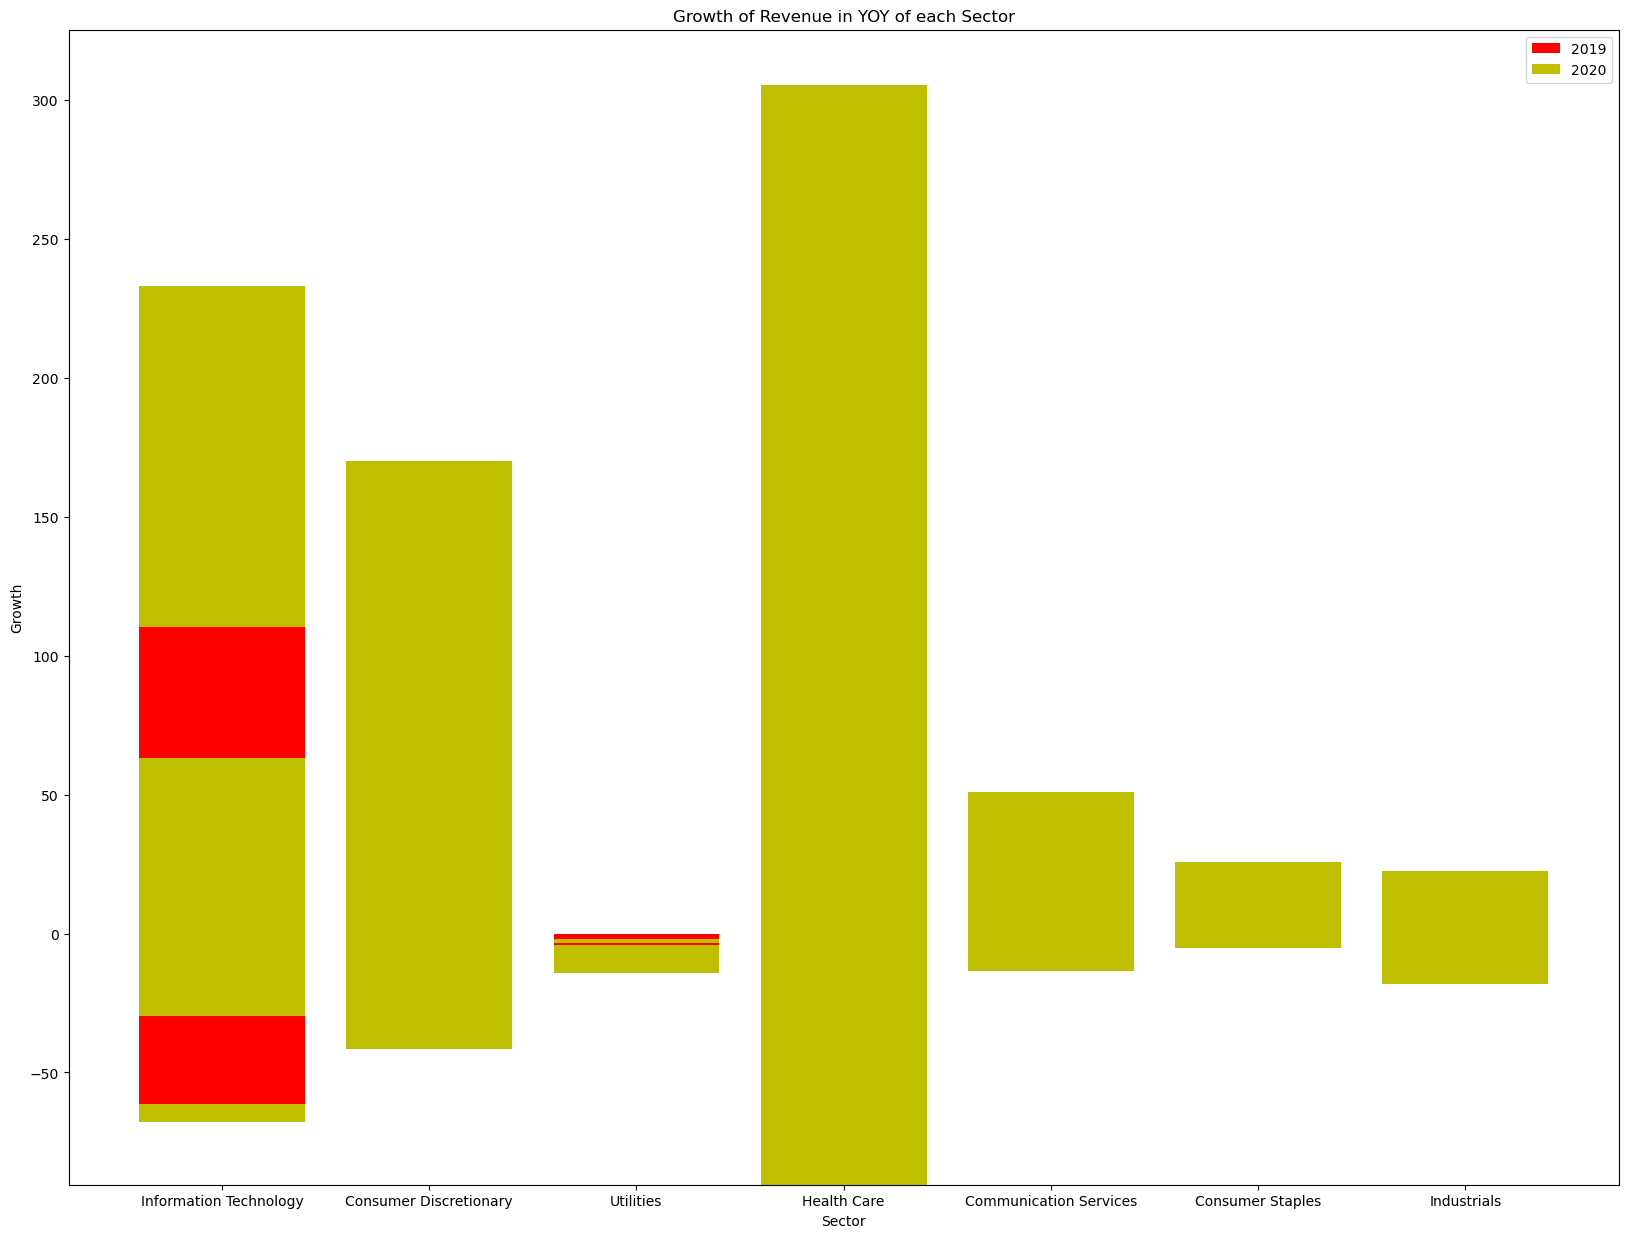

In [38]:
plt.figure(figsize=(20,15))
plt.bar(df['sector'],df['yoy_revenue_growth_2019'],color='r',label='2019')
plt.bar(df['sector'],df['yoy_revenue_growth_2020'],bottom=df['yoy_revenue_growth_2019'],color='y',label='2020')
plt.xlabel('Sector')
plt.ylabel('Growth')
plt.title('Growth of Revenue in YOY of each Sector')
plt.legend()
plt.show()

#### The greatest impact in Revenue due to COVID occured for the Sector:
        Information Technology

#### The lowest impact in Revenue due to COVID occured for the Sector:
        Utilities

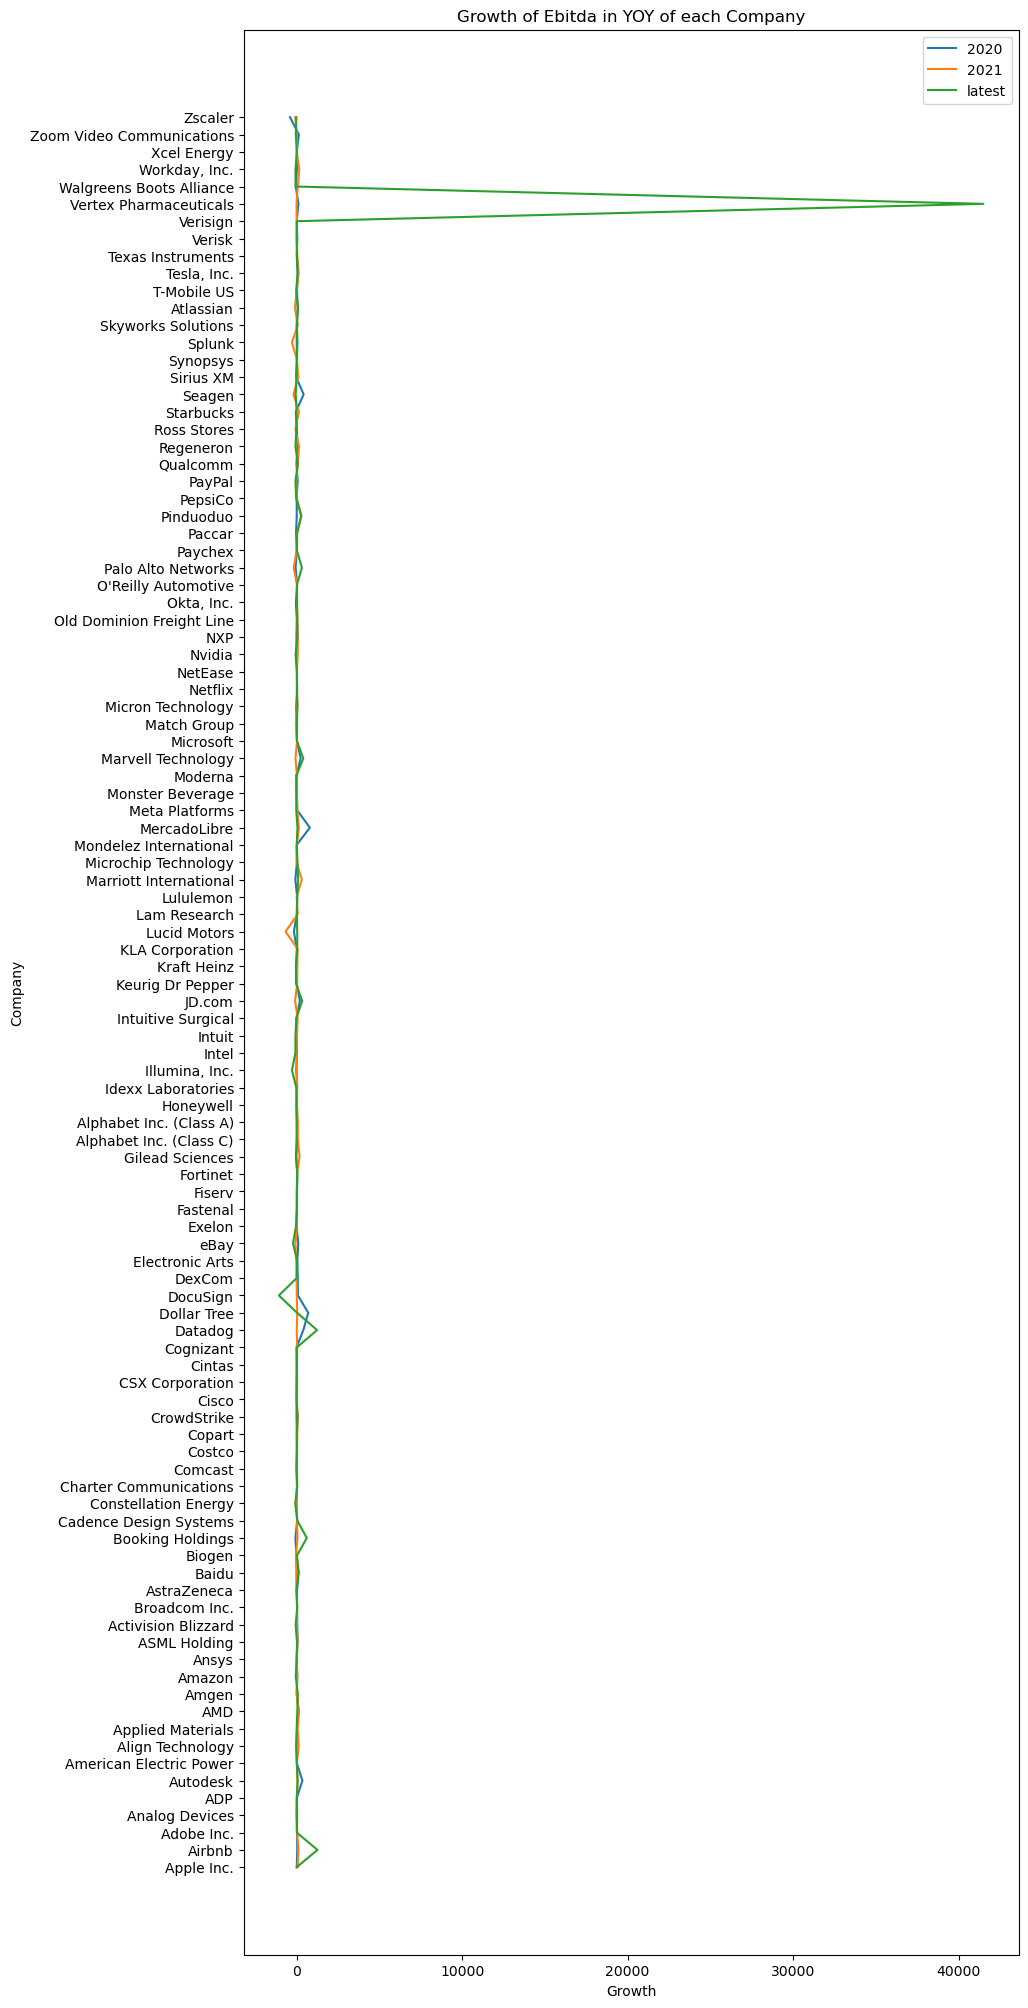

In [39]:
fig, ax = plt.subplots(figsize=(10,25))
ax.plot(df['yoy_ebitda_growth_2020'],df['company'],label='2020')
ax.plot(df['yoy_ebitda_growth_2021'],df['company'],label='2021')
ax.plot(df['yoy_ebitda_growth_latest'],df['company'],label='latest')


ax.legend()
ax.set_xlabel('Growth')
ax.set_ylabel('Company')
ax.set_title('Growth of Ebitda in YOY of each Company')

plt.show()

#### The Fastest recoveries Company in Ebitda:
    Vertex Pharmaceuticals

#### The Slowest recoveries Company in Ebitda:
    Pinduoduo, Booking Hotels, Marvell Technology, etc

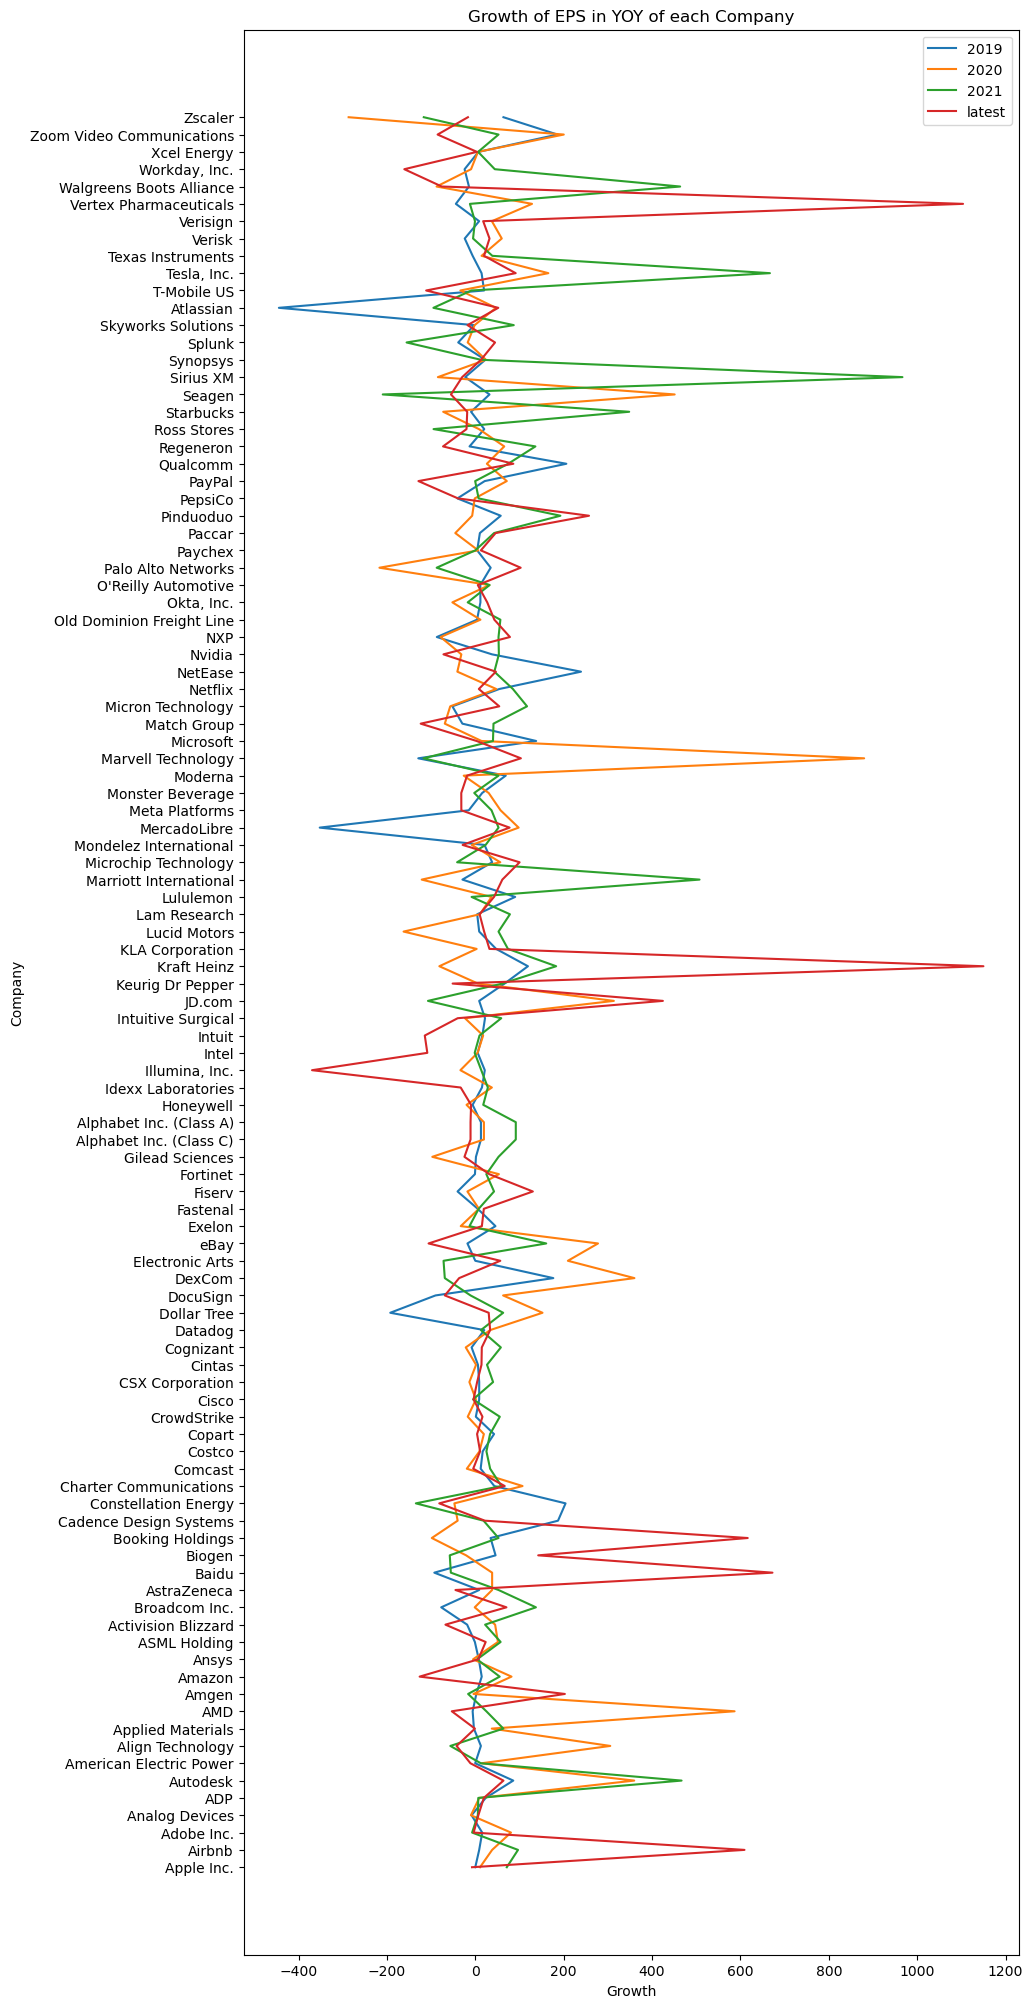

In [40]:
fig, ax = plt.subplots(figsize=(10,25))
ax.plot(df['yoy_eps_growth_2019'],df['company'],label='2019')
ax.plot(df['yoy_eps_growth_2020'],df['company'],label='2020')
ax.plot(df['yoy_eps_growth_2021'],df['company'],label='2021')
ax.plot(df['yoy_eps_growth_latest'],df['company'],label='latest')


ax.legend()
ax.set_xlabel('Growth')
ax.set_ylabel('Company')
ax.set_title('Growth of EPS in YOY of each Company')

plt.show()

#### The Fastest recoveries Company in EPS:
    Vertex Pharmaceuticals, Kraft Heinz

#### The Slowest recoveries Company in EPS:
    Verisign, Texas Instruments, Atlassian, etc

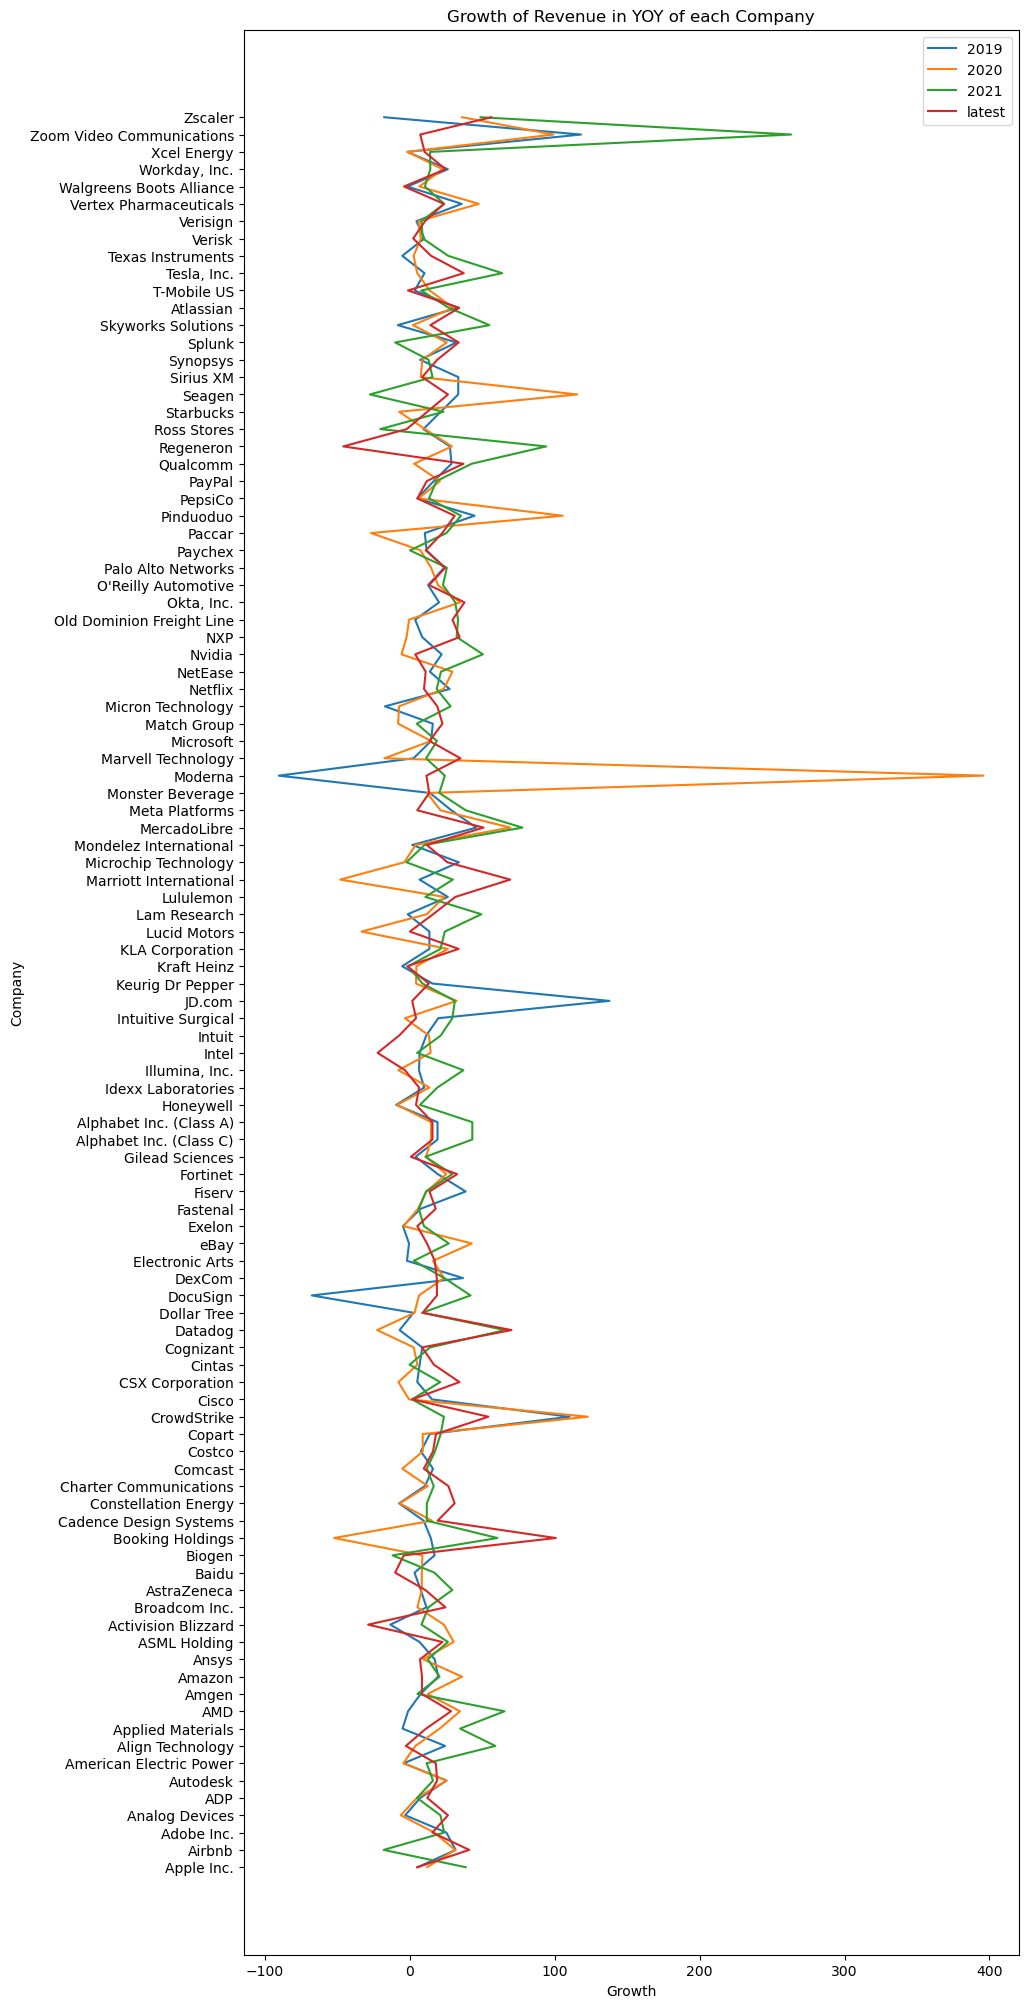

In [41]:
fig, ax = plt.subplots(figsize=(10,25))
ax.plot(df['yoy_revenue_growth_2019'],df['company'],label='2019')
ax.plot(df['yoy_revenue_growth_2020'],df['company'],label='2020')
ax.plot(df['yoy_revenue_growth_2021'],df['company'],label='2021')
ax.plot(df['yoy_revenue_growth_latest'],df['company'],label='latest')


ax.legend()
ax.set_xlabel('Growth')
ax.set_ylabel('Company')
ax.set_title('Growth of Revenue in YOY of each Company')

plt.show()

#### The Fastest recoveries Company in Revenue:
    Booking Holdings, DataDog

#### The Slowest recoveries Company in EPS:
    Lululemon, Copart, Qualcomm, etc

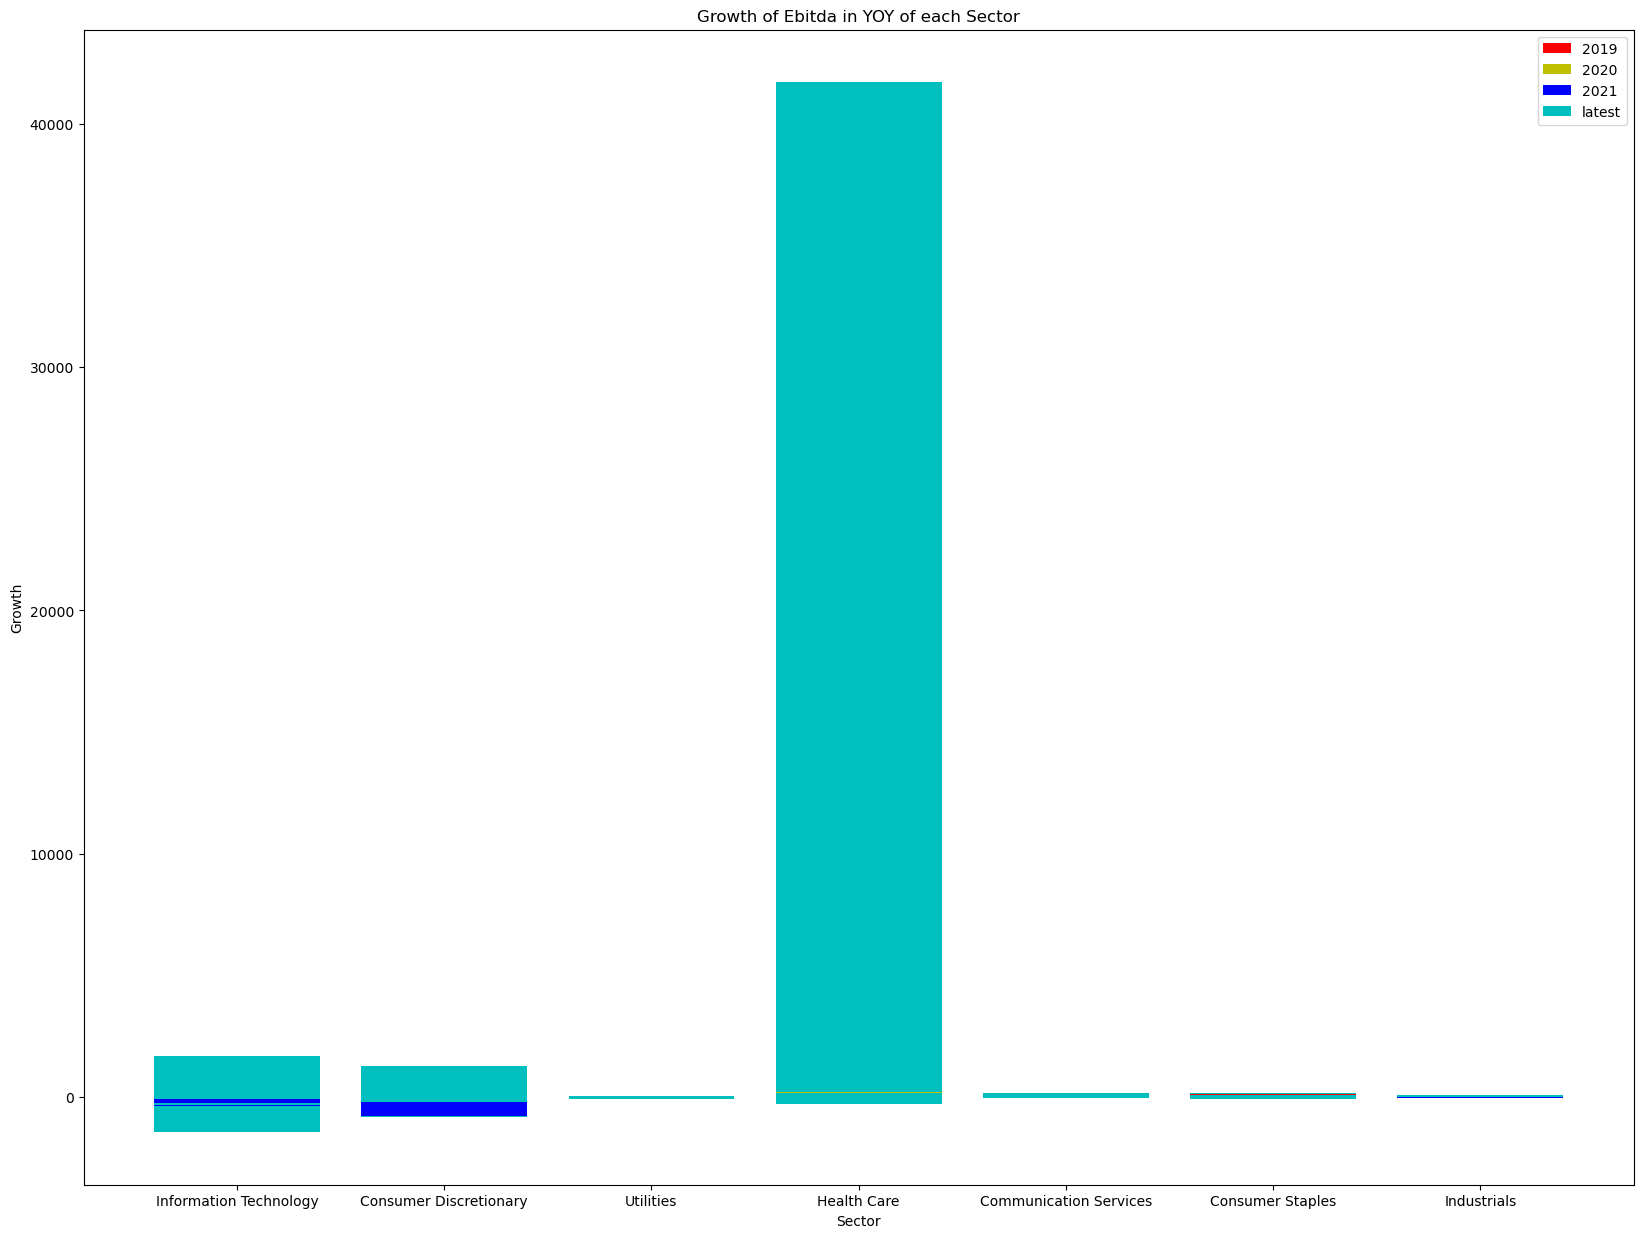

In [42]:
plt.figure(figsize=(20,15))
plt.bar(df['sector'],df['yoy_ebitda_growth_2019'],color='r',label='2019')
plt.bar(df['sector'],df['yoy_ebitda_growth_2020'],bottom=df['yoy_ebitda_growth_2019'],color='y',label='2020')
plt.bar(df['sector'],df['yoy_ebitda_growth_2021'],bottom=df['yoy_ebitda_growth_2019']+df['yoy_ebitda_growth_2020'],color='b',label='2021')
plt.bar(df['sector'],df['yoy_ebitda_growth_latest'],bottom=df['yoy_ebitda_growth_2019']+df['yoy_ebitda_growth_2020']+df['yoy_ebitda_growth_2021'],color='c',label='latest')

plt.xlabel('Sector')
plt.ylabel('Growth')
plt.title('Growth of Ebitda in YOY of each Sector')
plt.legend()
plt.show()

#### The Fastest recoveries Sector in Ebitda:
    Health Care Sector

#### The Slowest recoveries Sector in Ebitda:
    Consumer Staples, Communication Services

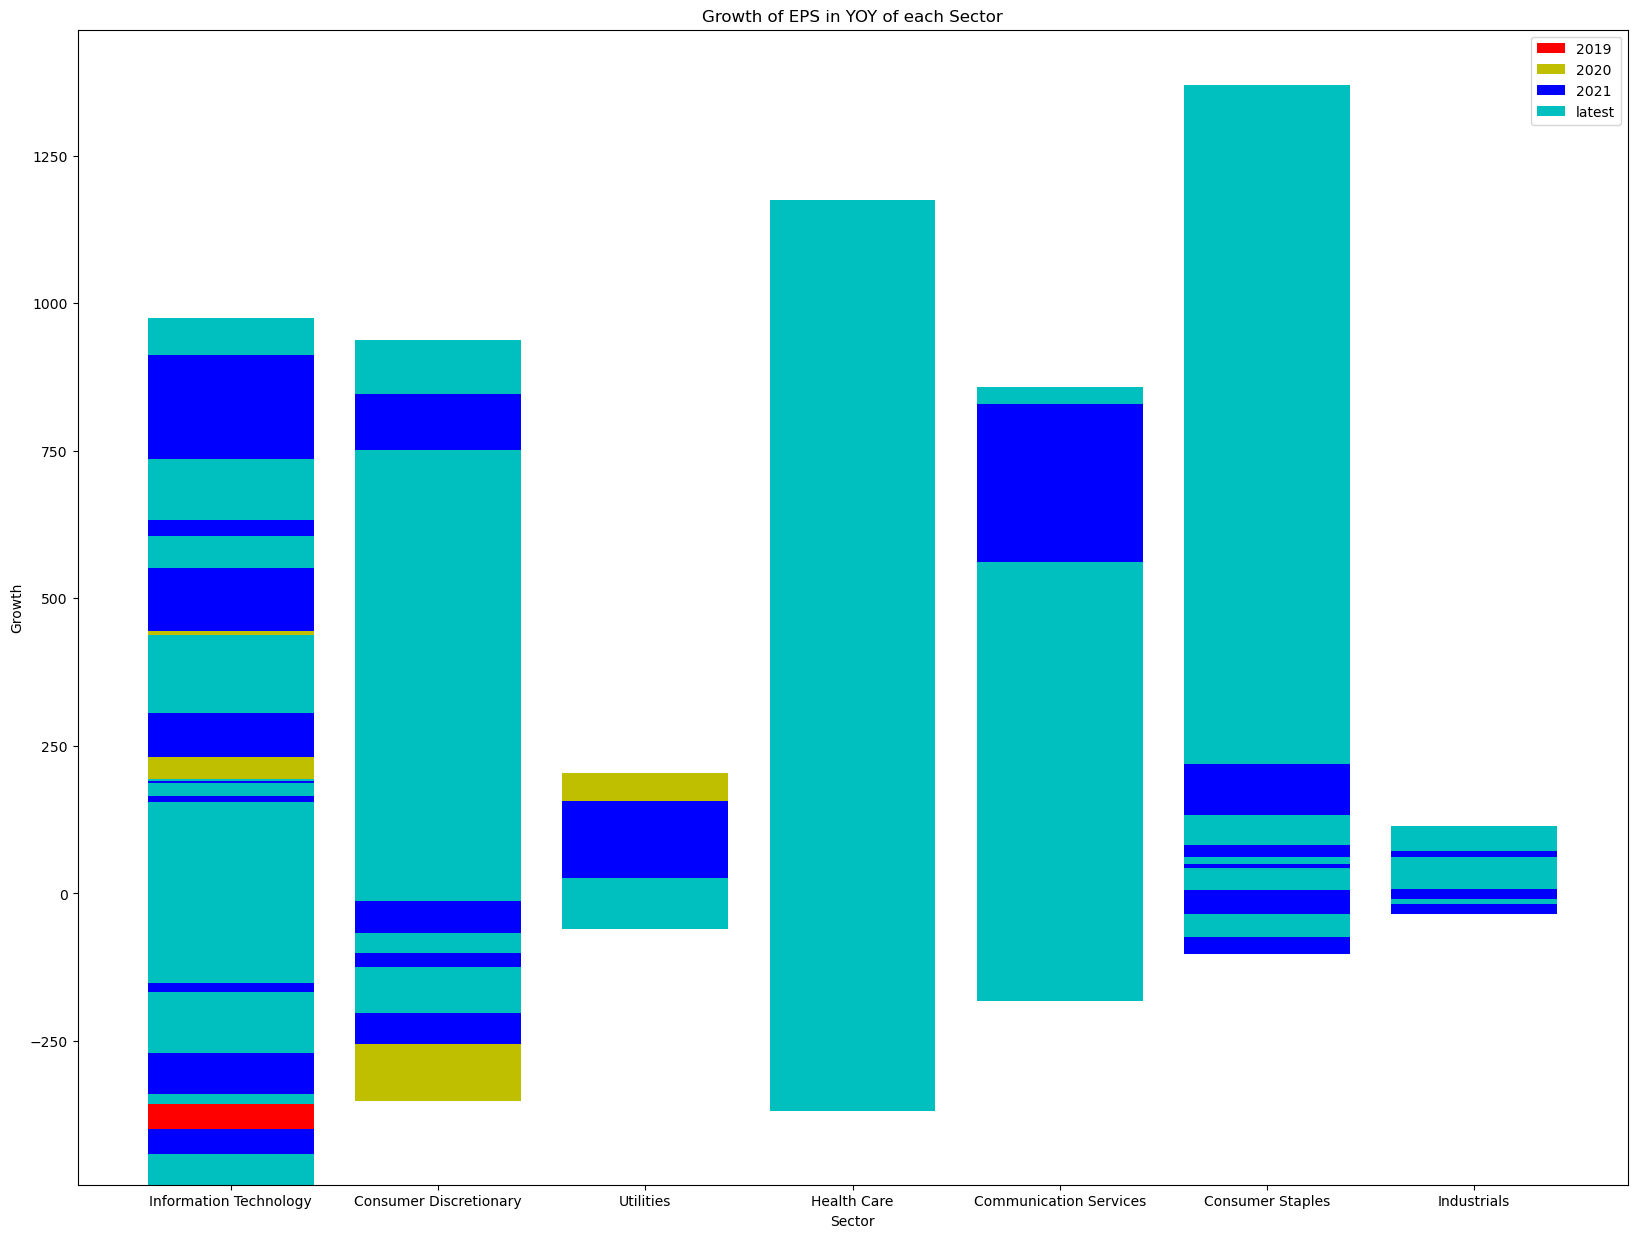

In [43]:
plt.figure(figsize=(20,15))
plt.bar(df['sector'],df['yoy_eps_growth_2019'],color='r',label='2019')
plt.bar(df['sector'],df['yoy_eps_growth_2020'],bottom=df['yoy_eps_growth_2019'],color='y',label='2020')
plt.bar(df['sector'],df['yoy_eps_growth_2021'],bottom=df['yoy_eps_growth_2019']+df['yoy_eps_growth_2020'],color='b',label='2021')
plt.bar(df['sector'],df['yoy_eps_growth_latest'],bottom=df['yoy_eps_growth_2019']+df['yoy_eps_growth_2020']+df['yoy_eps_growth_2021'],color='c',label='latest')

plt.xlabel('Sector')
plt.ylabel('Growth')
plt.title('Growth of EPS in YOY of each Sector')
plt.legend()
plt.show()

#### The Fastest recoveries Sector in EPS:
    Consumer Discretionary

#### The Slowest recoveries Sector in EPS:
    Industrials

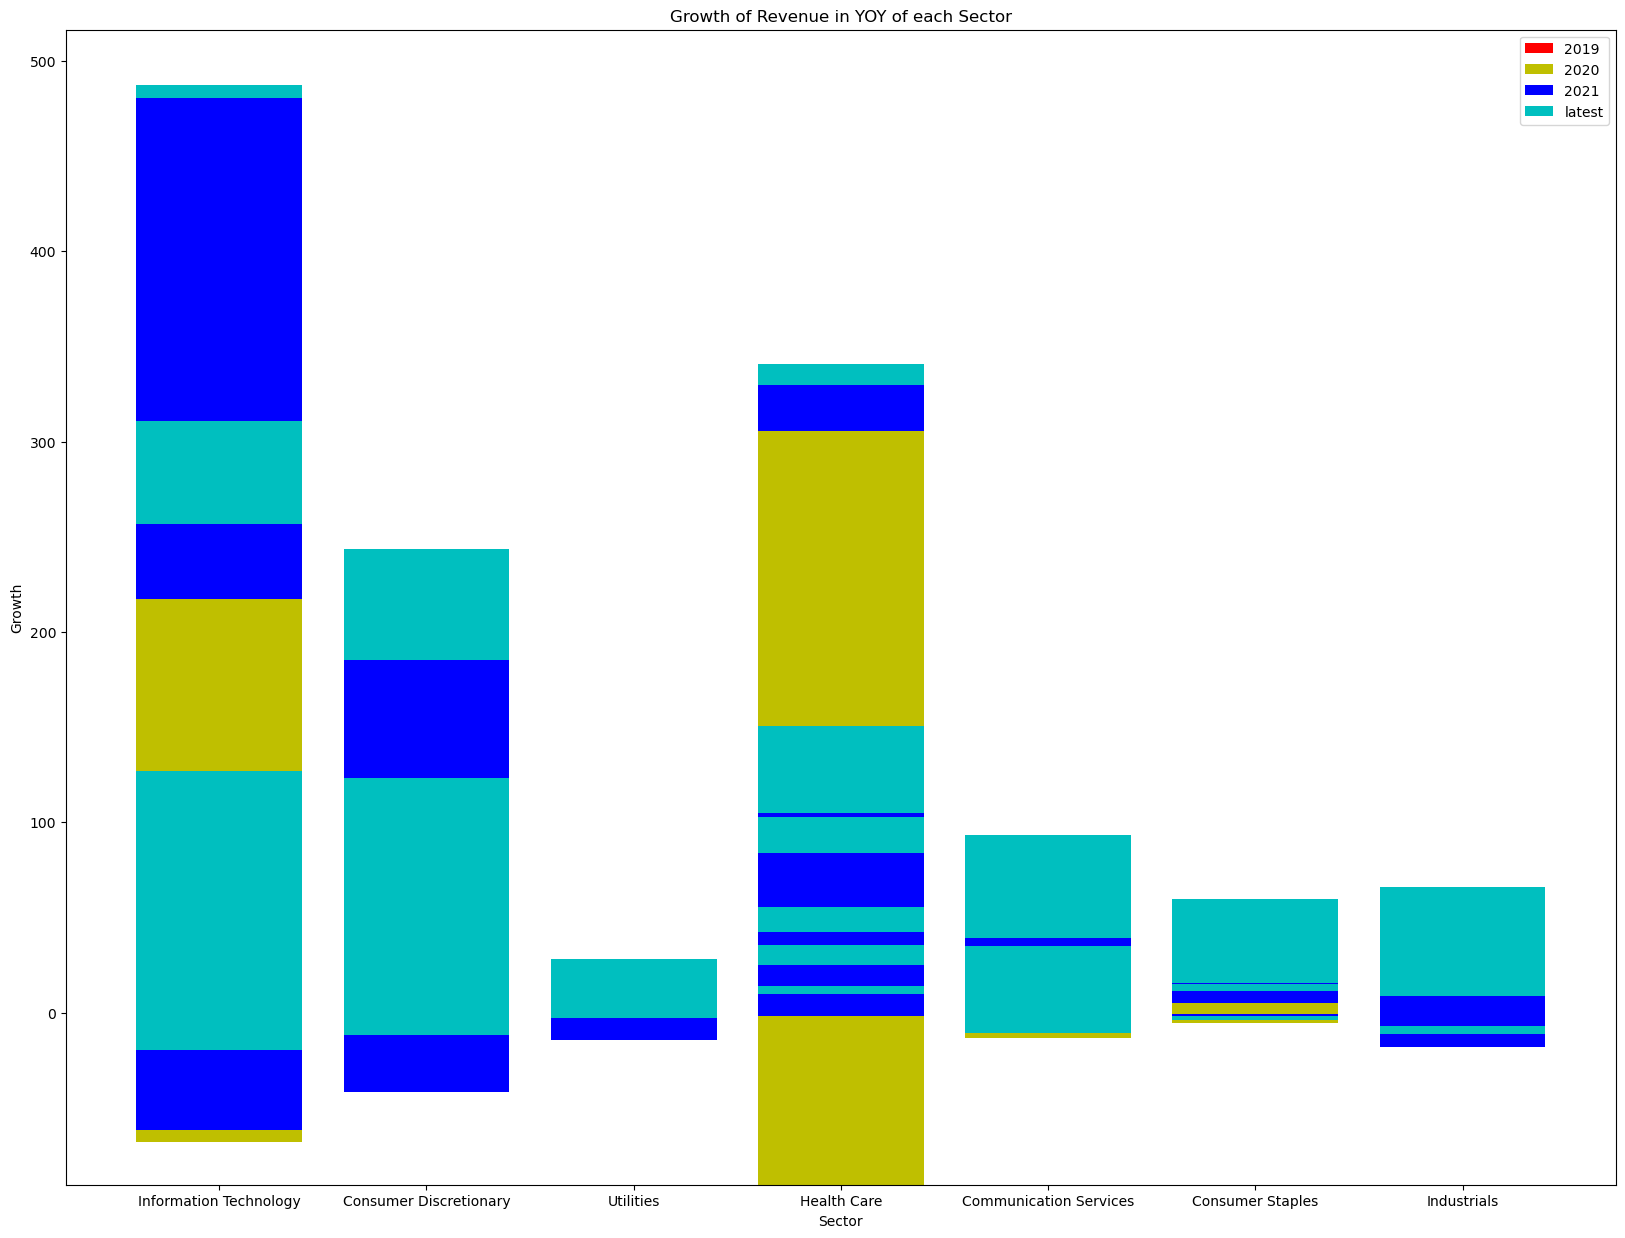

In [44]:
plt.figure(figsize=(20,15))
plt.bar(df['sector'],df['yoy_revenue_growth_2019'],color='r',label='2019')
plt.bar(df['sector'],df['yoy_revenue_growth_2020'],bottom=df['yoy_revenue_growth_2019'],color='y',label='2020')
plt.bar(df['sector'],df['yoy_revenue_growth_2021'],bottom=df['yoy_revenue_growth_2019']+df['yoy_revenue_growth_2020'],color='b',label='2021')
plt.bar(df['sector'],df['yoy_revenue_growth_latest'],bottom=df['yoy_revenue_growth_2019']+df['yoy_revenue_growth_2020']+df['yoy_revenue_growth_2021'],color='c',label='latest')

plt.xlabel('Sector')
plt.ylabel('Growth')
plt.title('Growth of Revenue in YOY of each Sector')
plt.legend()
plt.show()

#### The Fastest recoveries Sector in Revenue:
    Information Technology, Health Care Sector

#### The Slowest recoveries Sector in Revenue:
    Consumer Staples

# Project Task - Week 2

    1. Perform PCA to reduce the number of variables in the data
    
    2. After PCA, perform cluster analysis to identify cohorts, define these cohorts (cluster profiling), and specify the insights found
    
    3. Highlight companies from different sectors falling into the same cohort, and share your findings
    
    4. Plot seasonality, trend, and irregular components over time for the historical stock price of Apple
    
    5. Based on trend and seasonality, choose an appropriate exponential smoothing method to forecast the weekend share     price value for the next 12 months
    
    6. Perform an augmented Dickey–Fuller test (ADF) to check for the stationarity of Apple stock.
    
    7. Analyze the ACF and PACF plots for Apple's historical stock prices, strategize for ARIMA modeling, determine the     appropriate values of p, d, and q, and forecast the month-end share price value for the next 12 months
    
    8. Find the mean absolute percentage error (MAPE) for a 12-month period to validate the model
    
    9. Identify the top 2 companies from each sector based on market capitalization, create trend charts for the month-end  share price for the last five years (using the variable "adjusted close"), display the 12-month rolling mean and        standard deviation in the same chart, and share your observations regarding the stationarity of all companies
    
    10. Conduct an ADF test to verify the stationarity of the companies selected in the previous step
    
    11. Perform batch forecasting for the top 2 companies from each sector based on market capitalization for the weekend   share price value for the next 12 months using Auto ARIMA, and find the MAPE for a 12-month period to validate the model

In [45]:
df

Symbol                             Name     Market Cap Last Sale  \
0     AAPL                       Apple Inc.  2625740143000   $151.45   
1     ABNB                     Airbnb, Inc.    69569944167   $116.65   
2     ADBE                       Adobe Inc.   149144569000   $320.81   
3      ADI             Analog Devices, Inc.    75484763090   $146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096   $236.78   
..     ...                              ...            ...       ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934    $35.21   
98    WDAY                    Workday, Inc.    39549440000   $154.49   
99     XEL                 Xcel Energy Inc.    34192428038    $62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766    $82.85   
101     ZS                    Zscaler, Inc.    22393436472   $156.54   

    Net Change                    company                  sector  \
0        $2.00                 Apple Inc.  Information Technology   
1        $0.26                     Airbnb  Consumer Discretionary   
2        $4.59                 Adobe Inc.  Information Technology   
3        $2.23             Analog Devices  Information Technology   
4        $0.13                        ADP  Information Technology   
..         ...                        ...                     ...   
97       $0.52   Walgreens Boots Alliance        Consumer Staples   
98       $6.54              Workday, Inc.  Information Technology   
99       $0.93                Xcel Energy               Utilities   
100      $2.24  Zoom Video Communications  Information Technology   
101      $7.87                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals             0.660000   
1            Internet & Direct Marketing Retail             0.724932   
2                          Application Software             0.540000   
3                                Semiconductors             0.360000   
4         Data Processing & Outsourced Services             0.724932   
..                                          ...                  ...   
97                                  Drug Retail             1.710000   
98                         Application Software             0.724932   
99                              Multi-Utilities             0.270000   
100                        Application Software             0.724932   
101                        Application Software             0.724932   

     asset_turnover_2018  asset_turnover_2019  asset_turnover_2020  \
0                   0.72                 0.74                 0.83   
1                   0.55                 0.64                 0.36   
2                   0.54                 0.57                 0.57   
3                   0.30                 0.29                 0.26   
4                   0.34                 0.34                 0.35   
..                   ...                  ...                  ...   
97                  1.96                 1.77                 1.58   
98                  0.52                 0.54                 0.59   
99                  0.26                 0.24                 0.22   
100                 0.70                 1.16                 0.76   
101                 0.60                 0.58                 0.35   

     asset_turnover_2021  asset_turnover_latest  buyback_yield_2018  \
0                   1.08                   0.24            6.710000   
1                   0.50                   0.12            2.840964   
2                   0.61                   0.17            1.520000   
3                   0.20                   0.06            0.730000   
4                   0.33                   0.06            1.680000   
..                   ...                    ...                 ...   
97                  1.57                   0.35            8.010000   
98                  0.56            

In [46]:
df.to_csv('project 3.csv')

In [47]:
df_cat = df.select_dtypes(exclude=['int','float64'])

In [48]:
df_cat

Symbol                             Name Last Sale Net Change  \
0     AAPL                       Apple Inc.   $151.45      $2.00   
1     ABNB                     Airbnb, Inc.   $116.65      $0.26   
2     ADBE                       Adobe Inc.   $320.81      $4.59   
3      ADI             Analog Devices, Inc.   $146.76      $2.23   
4      ADP  Automatic Data Processing, Inc.   $236.78      $0.13   
..     ...                              ...       ...        ...   
97     WBA   Walgreens Boots Alliance, Inc.    $35.21      $0.52   
98    WDAY                    Workday, Inc.   $154.49      $6.54   
99     XEL                 Xcel Energy Inc.    $62.51      $0.93   
100     ZM  Zoom Video Communications, Inc.    $82.85      $2.24   
101     ZS                    Zscaler, Inc.   $156.54      $7.87   

                       company                  sector  \
0                   Apple Inc.  Information Technology   
1                       Airbnb  Consumer Discretionary   
2                   Adobe Inc.  Information Technology   
3               Analog Devices  Information Technology   
4                          ADP  Information Technology   
..                         ...                     ...   
97    Walgreens Boots Alliance        Consumer Staples   
98               Workday, Inc.  Information Technology   
99                 Xcel Energy               Utilities   
100  Zoom Video Communications  Information Technology   
101                    Zscaler  Information Technology   

                                      subsector  
0    Technology Hardware, Storage & Peripherals  
1            Internet & Direct Marketing Retail  
2                          Application Software  
3                                Semiconductors  
4         Data Processing & Outsourced Services  
..                                          ...  
97                                  Drug Retail  
98                         Application Software  
99                              Multi-Utilities  
100                        Application Software  
101                        Application Software  

[102 rows x 7 columns]

In [49]:
df['Last Sale'] = df['Last Sale'].str.replace('$','')

C:\Users\Vinosh\AppData\Local\Temp\ipykernel_12216\4158779774.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Last Sale'] = df['Last Sale'].str.replace('$','')


In [50]:
df['Last Sale'] = df['Last Sale'].str.replace(',','').astype(float)

In [51]:
df['Net Change'] = df['Net Change'].str.replace('$','')

C:\Users\Vinosh\AppData\Local\Temp\ipykernel_12216\907932616.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Net Change'] = df['Net Change'].str.replace('$','')


In [52]:
df['Net Change'] = df['Net Change'].str.replace(',','').astype(float)

In [53]:
df.dtypes

Symbol                        object
Name                          object
Market Cap                     int64
Last Sale                    float64
Net Change                   float64
                              ...   
yoy_revenue_growth_2018      float64
yoy_revenue_growth_2019      float64
yoy_revenue_growth_2020      float64
yoy_revenue_growth_2021      float64
yoy_revenue_growth_latest    float64
Length: 203, dtype: object

In [54]:
data = df.copy()

In [55]:
df = df.drop(['Symbol','Name'],axis=1)

In [56]:
df

Market Cap  Last Sale  Net Change                    company  \
0    2625740143000     151.45        2.00                 Apple Inc.   
1      69569944167     116.65        0.26                     Airbnb   
2     149144569000     320.81        4.59                 Adobe Inc.   
3      75484763090     146.76        2.23             Analog Devices   
4      98332762096     236.78        0.13                        ADP   
..             ...        ...         ...                        ...   
97     30450068934      35.21        0.52   Walgreens Boots Alliance   
98     39549440000     154.49        6.54              Workday, Inc.   
99     34192428038      62.51        0.93                Xcel Energy   
100    24659899766      82.85        2.24  Zoom Video Communications   
101    22393436472     156.54        7.87                    Zscaler   

                     sector                                   subsector  \
0    Information Technology  Technology Hardware, Storage & Peripherals   
1    Consumer Discretionary          Internet & Direct Marketing Retail   
2    Information Technology                        Application Software   
3    Information Technology                              Semiconductors   
4    Information Technology       Data Processing & Outsourced Services   
..                      ...                                         ...   
97         Consumer Staples                                 Drug Retail   
98   Information Technology                        Application Software   
99                Utilities                             Multi-Utilities   
100  Information Technology                        Application Software   
101  Information Technology                        Application Software   

     asset_turnover_2017  asset_turnover_2018  asset_turnover_2019  \
0               0.660000                 0.72                 0.74   
1               0.724932                 0.55                 0.64   
2               0.540000                 0.54                 0.57   
3               0.360000                 0.30                 0.29   
4               0.724932                 0.34                 0.34   
..                   ...                  ...                  ...   
97              1.710000                 1.96                 1.77   
98              0.724932                 0.52                 0.54   
99              0.270000                 0.26                 0.24   
100             0.724932                 0.70                 1.16   
101             0.724932                 0.60                 0.58   

     asset_turnover_2020  asset_turnover_2021  asset_turnover_latest  \
0                   0.83                 1.08                   0.24   
1                   0.36                 0.50                   0.12   
2                   0.57                 0.61                   0.17   
3                   0.26                 0.20                   0.06   
4                   0.35                 0.33                   0.06   
..                   ...                  ...                    ...   
97                  1.58                 1.57                   0.35   
98                  0.59                 0.56                   0.12   
99                  0.22                 0.24                   0.06   
100                 0.76                 0.81                   0.14   
101                 0.35                 0.33                   0.12   

     buyback_yield_2018  buyback_yield_2019  buyback_yield_2020  \
0              6.710000            6.640000            3.640000   
1              2.840964            2.419878           -4.150000   
2              1.520000            1.690000            1.210000   
3              0.730000            1.560000            0.560000   
4              1.680000            1.310000            1.570000   
..                  ...                 ...                 ...   
97             8.010000            9.080000            4.830000   


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
df['sector'] = le.fit_transform(df['sector'])
df['subsector'] = le.fit_transform(df['subsector'])

In [59]:
df = pd.get_dummies(df, columns = ['company'])

In [60]:
df

Market Cap  Last Sale  Net Change  sector  subsector  \
0    2625740143000     151.45        2.00       5         38   
1      69569944167     116.65        0.26       1         23   
2     149144569000     320.81        4.59       5          2   
3      75484763090     146.76        2.23       5         34   
4      98332762096     236.78        0.13       5         10   
..             ...        ...         ...     ...        ...   
97     30450068934      35.21        0.52       2         12   
98     39549440000     154.49        6.54       5          2   
99     34192428038      62.51        0.93       6         27   
100    24659899766      82.85        2.24       5          2   
101    22393436472     156.54        7.87       5          2   

     asset_turnover_2017  asset_turnover_2018  asset_turnover_2019  \
0               0.660000                 0.72                 0.74   
1               0.724932                 0.55                 0.64   
2               0.540000                 0.54                 0.57   
3               0.360000                 0.30                 0.29   
4               0.724932                 0.34                 0.34   
..                   ...                  ...                  ...   
97              1.710000                 1.96                 1.77   
98              0.724932                 0.52                 0.54   
99              0.270000                 0.26                 0.24   
100             0.724932                 0.70                 1.16   
101             0.724932                 0.60                 0.58   

     asset_turnover_2020  asset_turnover_2021  asset_turnover_latest  \
0                   0.83                 1.08                   0.24   
1                   0.36                 0.50                   0.12   
2                   0.57                 0.61                   0.17   
3                   0.26                 0.20                   0.06   
4                   0.35                 0.33                   0.06   
..                   ...                  ...                    ...   
97                  1.58                 1.57                   0.35   
98                  0.59                 0.56                   0.12   
99                  0.22                 0.24                   0.06   
100                 0.76                 0.81                   0.14   
101                 0.35                 0.33                   0.12   

     buyback_yield_2018  buyback_yield_2019  buyback_yield_2020  \
0              6.710000            6.640000            3.640000   
1              2.840964            2.419878           -4.150000   
2              1.520000            1.690000            1.210000   
3              0.730000            1.560000            0.560000   
4              1.680000            1.310000            1.570000   
..                  ...                 ...                 ...   
97             8.010000            9.080000            4.830000   
98             2.840964            2.419878            1.422184   
99            -0.900000           -1.380000           -2.030000   
100            2.840964            2.419878           -2.550000   
101           -4.770000            2.419878            1.422184   

     buyback_yield_2021  buyback_yield_latest  capex_to_revenue_2017  \
0              3.650000                  3.57               0.050000   
1              1.733289                  0.00               0.040000   
2              1.150000                  4.22               0.020000   
3              3.410000                  5.97               0.040000   
4              1.630000                  2.06               0.086892   
..                  ...                   ...                    ...   
97             0.250000                  0.66               0.010000   
98             1.733289                  0.00               0.086892   
99            -0.990000                  0.00               0.280000   
100     

In [61]:
df.dtypes

Market Cap                             int64
Last Sale                            float64
Net Change                           float64
sector                                 int32
subsector                              int32
                                      ...   
company_Workday, Inc.                  uint8
company_Xcel Energy                    uint8
company_Zoom Video Communications      uint8
company_Zscaler                        uint8
company_eBay                           uint8
Length: 302, dtype: object

In [62]:
df.columns

Index(['Market Cap', 'Last Sale', 'Net Change', 'sector', 'subsector',
       'asset_turnover_2017', 'asset_turnover_2018', 'asset_turnover_2019',
       'asset_turnover_2020', 'asset_turnover_2021',
       ...
       'company_Texas Instruments', 'company_Verisign', 'company_Verisk',
       'company_Vertex Pharmaceuticals', 'company_Walgreens Boots Alliance',
       'company_Workday, Inc.', 'company_Xcel Energy',
       'company_Zoom Video Communications', 'company_Zscaler', 'company_eBay'],
      dtype='object', length=302)

#### The columns are converted to numerical data and its ready for modeling

# Principal Component Analysis (PCA)

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
X = df.drop('Last Sale',axis=1)

In [65]:
y = df['Last Sale']

In [66]:
std = StandardScaler()

In [67]:
X_std = std.fit_transform(X)

In [68]:
pca = PCA(n_components=0.9)

In [69]:
X_pca = pca.fit_transform(X_std)

In [70]:
X_pca.shape

(102, 73)

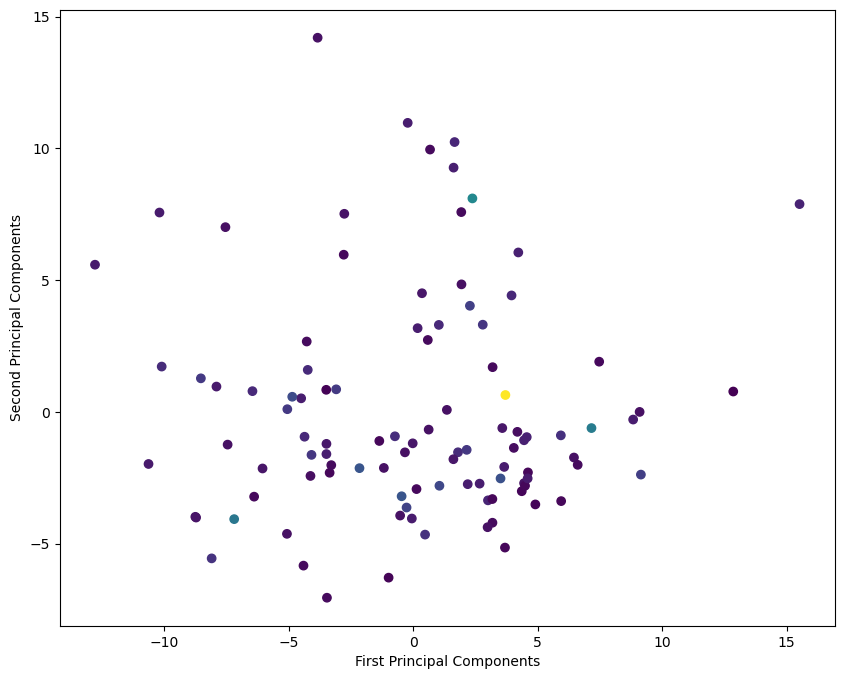

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('First Principal Components')
plt.ylabel('Second Principal Components')
plt.show()

In [72]:
pca.components_

array([[-0.0168957 , -0.00649599, -0.00638135, ..., -0.02769942,
        -0.00080635,  0.01693557],
       [-0.03577938,  0.05660326,  0.02461218, ...,  0.03995057,
         0.06250352, -0.01308477],
       [-0.02202355, -0.03856795, -0.01964456, ..., -0.00644636,
         0.00911479, -0.0012068 ],
       ...,
       [-0.01743587, -0.06150392, -0.02043442, ...,  0.01421882,
         0.03464388, -0.08582917],
       [ 0.00949545,  0.06542478, -0.02726815, ...,  0.0006594 ,
        -0.07171743, -0.08376341],
       [-0.04744072, -0.01231   ,  0.00284727, ...,  0.02600811,
        -0.0262894 ,  0.00499303]])

# Clustering

In [73]:
from sklearn.cluster import KMeans

In [74]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X_pca)
    sse.append(km.inertia_)

C:\Users\Vinosh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


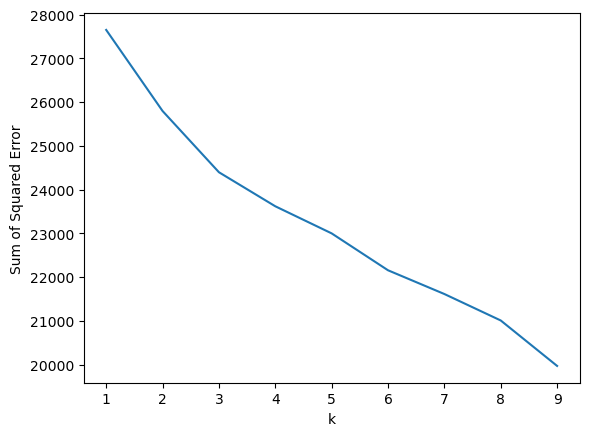

In [75]:
plt.plot(k_range,sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.show()

Here we take the K value - 3

In [76]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [77]:
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [78]:
labels = kmeans.labels_ 

In [79]:
data['cluster'] = labels

In [80]:
data['cluster'].value_counts()

2    60
0    41
1     1
Name: cluster, dtype: int64

In [81]:
data

Symbol                             Name     Market Cap  Last Sale  \
0     AAPL                       Apple Inc.  2625740143000     151.45   
1     ABNB                     Airbnb, Inc.    69569944167     116.65   
2     ADBE                       Adobe Inc.   149144569000     320.81   
3      ADI             Analog Devices, Inc.    75484763090     146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096     236.78   
..     ...                              ...            ...        ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934      35.21   
98    WDAY                    Workday, Inc.    39549440000     154.49   
99     XEL                 Xcel Energy Inc.    34192428038      62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766      82.85   
101     ZS                    Zscaler, Inc.    22393436472     156.54   

     Net Change                    company                  sector  \
0          2.00                 Apple Inc.  Information Technology   
1          0.26                     Airbnb  Consumer Discretionary   
2          4.59                 Adobe Inc.  Information Technology   
3          2.23             Analog Devices  Information Technology   
4          0.13                        ADP  Information Technology   
..          ...                        ...                     ...   
97         0.52   Walgreens Boots Alliance        Consumer Staples   
98         6.54              Workday, Inc.  Information Technology   
99         0.93                Xcel Energy               Utilities   
100        2.24  Zoom Video Communications  Information Technology   
101        7.87                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals             0.660000   
1            Internet & Direct Marketing Retail             0.724932   
2                          Application Software             0.540000   
3                                Semiconductors             0.360000   
4         Data Processing & Outsourced Services             0.724932   
..                                          ...                  ...   
97                                  Drug Retail             1.710000   
98                         Application Software             0.724932   
99                              Multi-Utilities             0.270000   
100                        Application Software             0.724932   
101                        Application Software             0.724932   

     asset_turnover_2018  asset_turnover_2019  asset_turnover_2020  \
0                   0.72                 0.74                 0.83   
1                   0.55                 0.64                 0.36   
2                   0.54                 0.57                 0.57   
3                   0.30                 0.29                 0.26   
4                   0.34                 0.34                 0.35   
..                   ...                  ...                  ...   
97                  1.96                 1.77                 1.58   
98                  0.52                 0.54                 0.59   
99                  0.26                 0.24                 0.22   
100                 0.70                 1.16                 0.76   
101                 0.60                 0.58                 0.35   

     asset_turnover_2021  asset_turnover_latest  buyback_yield_2018  \
0                   1.08                   0.24            6.710000   
1                   0.50                   0.12            2.840964   
2                   0.61                   0.17            1.520000   
3                   0.20                   0.06            0.730000   
4                   0.33                   0.06            1.680000   
..                   ...                    ...                 ...   
97                  1.57                   0.35            8.010000   
98          

In [82]:
centroid = kmeans.cluster_centers_

In [83]:
centroid

array([[-4.91485934e+00, -6.36640897e-01,  1.64902224e-01,
        -1.10279230e+00,  2.14989774e-01, -2.01616520e-01,
        -2.14740247e-01,  6.91697674e-03,  3.70426441e-02,
         5.65681314e-02,  3.66665737e-01, -4.76257751e-02,
        -5.61761102e-02, -3.40590401e-01, -1.53953941e-01,
         4.12863389e-02, -6.58672611e-02, -8.89684964e-03,
        -5.74422960e-02,  6.04005043e-02,  1.21086493e-01,
        -1.13563871e-03, -8.09750267e-02, -1.10856245e-01,
         8.88021146e-02,  2.52051639e-01,  2.82430136e-01,
         9.18495712e-02,  3.49297458e-02,  5.55786420e-02,
         4.59098876e-02,  9.41411871e-02, -1.48122314e-01,
         1.37062026e-01, -9.79252679e-02,  1.63318877e-02,
        -1.64086808e-01, -1.79466611e-02, -2.52079835e-02,
        -2.61830317e-03, -1.06137167e-01,  5.47965243e-02,
        -8.37083008e-02, -3.69271195e-02, -8.26818082e-02,
        -7.79069554e-02,  6.13827367e-02,  1.31496955e-01,
         2.98158011e-02, -8.78043742e-02, -1.41678079e-0

In [84]:
cluster_group = data.groupby('cluster').mean()
cluster_group

Market Cap   Last Sale  Net Change  asset_turnover_2017  \
cluster                                                              
0        1.392856e+11  177.393002    4.195685             0.849739   
1        5.351023e+10  136.785000    3.765000             0.140000   
2        1.689867e+11  192.815832    4.122332             0.649395   

         asset_turnover_2018  asset_turnover_2019  asset_turnover_2020  \
cluster                                                                  
0                   0.949668             0.901118              0.81936   
1                   0.080000             0.030000              0.06000   
2                   0.618607             0.600667              0.55050   

         asset_turnover_2021  asset_turnover_latest  buyback_yield_2018  \
cluster                                                                   
0                   0.802439               0.194878            2.078898   
1                   1.110000               0.170000          -11.210000   
2                   0.582333               0.155833            3.595892   

         buyback_yield_2019  buyback_yield_2020  buyback_yield_2021  \
cluster                                                               
0                  1.783891            1.022408            1.251861   
1                  2.419878           -4.450000            0.840000   
2                  2.854470            1.793234            2.077154   

         buyback_yield_latest  capex_to_revenue_2017  capex_to_revenue_2018  \
cluster                                                                       
0                    2.389268               0.076071               0.076498   
1                    3.970000               0.330000               0.860000   
2                    3.167833               0.090234               0.074833   

         capex_to_revenue_2019  capex_to_revenue_2020  capex_to_revenue_2021  \
cluster                                                                        
0                     0.636952               2.915540               0.443659   
1                     0.670000               0.250000               0.020000   
2                     0.072167               0.072667               0.071510   

         capex_to_revenue_latest  cash_ratio_2017  cash_ratio_2018  \
cluster                                                              
0                       0.148537         1.882262         1.873015   
1                       0.020000         3.950000         6.830000   
2                       0.064500         1.045420         0.890393   

         cash_ratio_2019  cash_ratio_2020  cash_ratio_2021  cash_ratio_latest  \
cluster                                                                         
0               1.825977         2.176098         2.159024           1.710732   
1               7.710000         1.050000         1.180000           1.160000   
2               0.672333         0.812500         0.689500           0.565000   

         cash_to_debt_2018  cash_to_debt_2019  cash_to_debt_2020  \
cluster                                                            
0                 5.799435           3.679213          19.596934   
1                45.430000           8.330000          19.440000   
2                 1.100520           0.783231           0.874405   

         cash_to_debt_2021  cash_to_debt_latest  cogs_to_revenue_2017  \
cluster                                                                 
0                 4.478405             4.658517              0.401106   
1                11.710000             8.900000              0.437534   
2                 0.684000             0.628667              0.462427   

         cogs_to_revenue_2018  cogs_to_revenue_2019  cogs_to_revenue_2020  \
cluster                                                                     
0                    0.388630              0.405366              0.409024   
1                    0.423838              0.428500              

In [85]:
data[['cluster','company']]

cluster                    company
0          2                 Apple Inc.
1          2                     Airbnb
2          0                 Adobe Inc.
3          2             Analog Devices
4          2                        ADP
..       ...                        ...
97         2   Walgreens Boots Alliance
98         2              Workday, Inc.
99         2                Xcel Energy
100        0  Zoom Video Communications
101        2                    Zscaler

[102 rows x 2 columns]

In [86]:
cohort = data.groupby(['cluster','sector'])['company'].apply(list)

In [87]:
print(cohort)

cluster  sector                
0        Communication Services    [Activision Blizzard, Electronic Arts, Alphabe...
         Consumer Discretionary    [JD.com, Lucid Motors, Lululemon, Pinduoduo, R...
         Consumer Staples                                 [Costco, Monster Beverage]
         Health Care               [Align Technology, DexCom, Illumina, Inc., Int...
         Industrials                   [Copart, Fastenal, Old Dominion Freight Line]
         Information Technology    [Adobe Inc., Applied Materials, AMD, Ansys, AS...
1        Health Care                                                       [Moderna]
2        Communication Services    [Baidu, Charter Communications, Comcast, Match...
         Consumer Discretionary    [Airbnb, Amazon, Booking Holdings, Dollar Tree...
         Consumer Staples          [Keurig Dr Pepper, Kraft Heinz, Mondelez Inter...
         Health Care               [Amgen, AstraZeneca, Biogen, Gilead Sciences, ...
         Industrials             

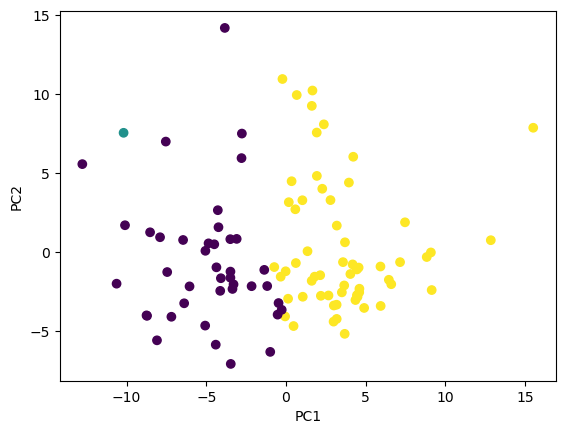

In [88]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=data['cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Seasonality, Trend, and Irregular Components

<AxesSubplot:>

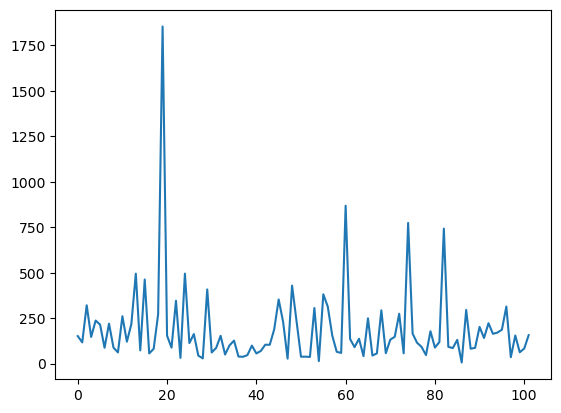

In [89]:
df['Last Sale'].plot()

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [91]:
period = 12

In [92]:
result = seasonal_decompose(df['Last Sale'], model = 'additive',period=period)

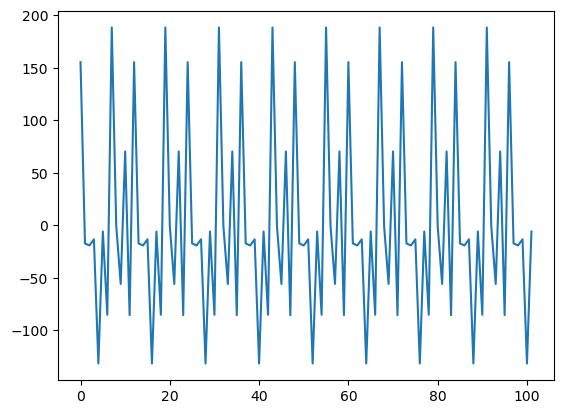

In [93]:
result.seasonal.plot()
plt.show()

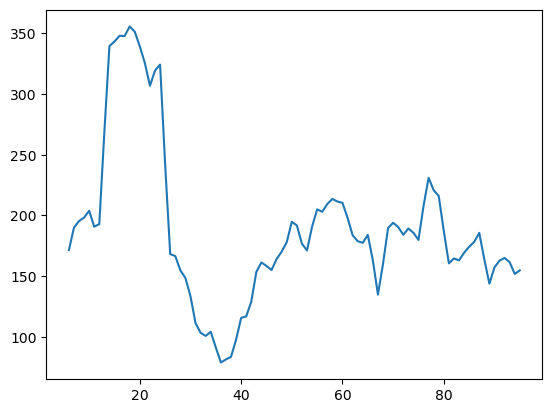

In [94]:
result.trend.plot()
plt.show()

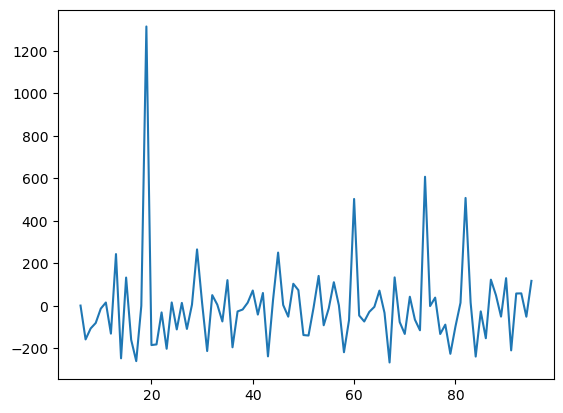

In [95]:
result.resid.plot()
plt.show()

In [96]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [97]:
train_data = df[:-20]['Last Sale']
test_data = df[-20:]['Last Sale']

In [98]:
train_data

0     151.450
1     116.650
2     320.810
3     146.760
4     236.780
       ...   
77     92.195
78     46.840
79    178.080
80     88.450
81    118.880
Name: Last Sale, Length: 82, dtype: float64

In [99]:
test_data

82     742.475
83      92.430
84      85.450
85     130.470
86       6.275
87     295.265
88      81.850
89      86.850
90     202.030
91     141.110
92     222.250
93     164.000
94     170.630
95     186.500
96     313.930
97      35.210
98     154.490
99      62.510
100     82.850
101    156.540
Name: Last Sale, dtype: float64

In [100]:
model_exp = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7*4)

In [101]:
fit_exp = model_exp.fit()

In [102]:
exp_predictions = fit_exp.forecast(len(test_data))

In [103]:
print(exp_predictions)

82      50.097355
83     312.302831
84     257.117140
85     199.823242
86      75.218237
87      68.437841
88     716.134759
89     120.673449
90      90.352816
91     136.052409
92      40.471411
93     202.052728
94      50.332615
95      64.135432
96     245.176717
97      72.864656
98     120.676483
99     151.507547
100    245.863690
101    104.562837
dtype: float64


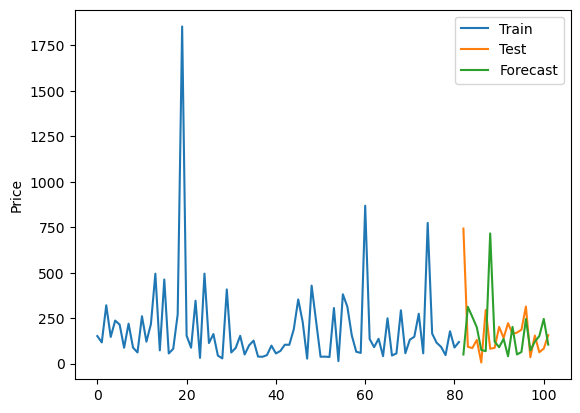

In [104]:
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(exp_predictions.index, exp_predictions, label='Forecast')
plt.legend(loc='best')
plt.ylabel('Price')
plt.show()

In [105]:
from statsmodels.tsa.stattools import adfuller

In [106]:
result_adfuller = adfuller(df['Last Sale'])

In [107]:
print('ADF Statistics :', result_adfuller[0])

ADF Statistics : -10.59343493822481


In [108]:
print('P-value :',result_adfuller[1])

P-value : 6.43970962377371e-19


In [109]:
print('Critical Values :')
for key, value in result_adfuller[4].items():
    print('\t%s : %.3f' % (key,value))

Critical Values :
	1% : -3.497
	5% : -2.891
	10% : -2.582


In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [111]:
train_data

0     151.450
1     116.650
2     320.810
3     146.760
4     236.780
       ...   
77     92.195
78     46.840
79    178.080
80     88.450
81    118.880
Name: Last Sale, Length: 82, dtype: float64

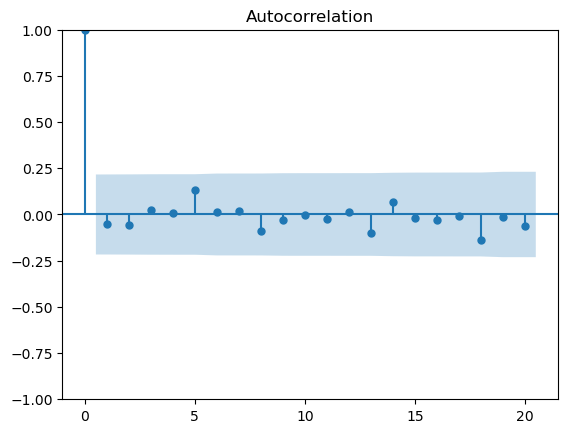

In [112]:
acf = plot_acf(train_data)

C:\Users\Vinosh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


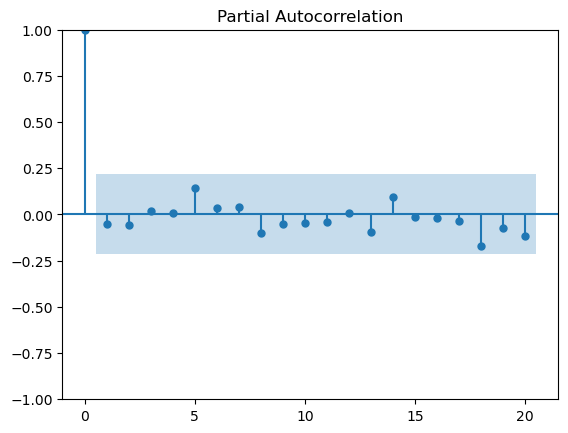

In [113]:
pacf = plot_pacf(train_data)

In [114]:
from statsmodels.tsa.arima.model import ARIMA

In [115]:
model_arima = ARIMA(train_data,order=(2,1,0))

In [116]:
arima_fit = model_arima.fit()

In [117]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Last Sale   No. Observations:                   82
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -572.440
Date:                Thu, 06 Apr 2023   AIC                           1150.881
Time:                        17:53:00   BIC                           1158.064
Sample:                             0   HQIC                          1153.763
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6822      0.068    -10.054      0.000      -0.815      -0.549
ar.L2         -0.3748      0.074     -5.053      0.000      -0.520      -0.229
sigma2      8.159e+04   4555.036     17.912      0.0

In [118]:
arima_predictions = arima_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

In [119]:
arima_predictions

82     131.710497
83     111.552761
84     120.496535
85     121.949357
86     117.606310
87     120.024806
88     120.002481
89     119.111326
90     119.727669
91     119.641160
92     119.469191
93     119.618935
94     119.581224
95     119.550832
96     119.585699
97     119.573302
98     119.568692
99     119.576483
100    119.572895
101    119.572423
Name: predicted_mean, dtype: float64

In [120]:
from sklearn.metrics import mean_absolute_percentage_error

In [121]:
mape = mean_absolute_percentage_error(test_data,arima_predictions)

In [122]:
print('MAPE :',mape)

MAPE : 1.373112630606639


In [123]:
data1 = data.copy()

In [124]:
grouped = data.groupby('sector')

In [125]:
top_companies = {}

In [126]:
for sector, data in grouped:
    sorted_data = data.sort_values('Market Cap',ascending=False)
    top_2 = sorted_data.iloc[:2]['company'].tolist()
    top_companies[sector] = top_2

In [127]:
for sector,companies in top_companies.items():
    print(f"{sector} : {',' .join(companies)}")

Communication Services : Alphabet Inc. (Class C),Alphabet Inc. (Class A)
Consumer Discretionary : Amazon,Tesla, Inc.
Consumer Staples : PepsiCo,Costco
Health Care : AstraZeneca,Amgen
Industrials : Honeywell,CSX Corporation
Information Technology : Apple Inc.,Microsoft
Utilities : American Electric Power,Exelon


In [128]:
data1

Symbol                             Name     Market Cap  Last Sale  \
0     AAPL                       Apple Inc.  2625740143000     151.45   
1     ABNB                     Airbnb, Inc.    69569944167     116.65   
2     ADBE                       Adobe Inc.   149144569000     320.81   
3      ADI             Analog Devices, Inc.    75484763090     146.76   
4      ADP  Automatic Data Processing, Inc.    98332762096     236.78   
..     ...                              ...            ...        ...   
97     WBA   Walgreens Boots Alliance, Inc.    30450068934      35.21   
98    WDAY                    Workday, Inc.    39549440000     154.49   
99     XEL                 Xcel Energy Inc.    34192428038      62.51   
100     ZM  Zoom Video Communications, Inc.    24659899766      82.85   
101     ZS                    Zscaler, Inc.    22393436472     156.54   

     Net Change                    company                  sector  \
0          2.00                 Apple Inc.  Information Technology   
1          0.26                     Airbnb  Consumer Discretionary   
2          4.59                 Adobe Inc.  Information Technology   
3          2.23             Analog Devices  Information Technology   
4          0.13                        ADP  Information Technology   
..          ...                        ...                     ...   
97         0.52   Walgreens Boots Alliance        Consumer Staples   
98         6.54              Workday, Inc.  Information Technology   
99         0.93                Xcel Energy               Utilities   
100        2.24  Zoom Video Communications  Information Technology   
101        7.87                    Zscaler  Information Technology   

                                      subsector  asset_turnover_2017  \
0    Technology Hardware, Storage & Peripherals             0.660000   
1            Internet & Direct Marketing Retail             0.724932   
2                          Application Software             0.540000   
3                                Semiconductors             0.360000   
4         Data Processing & Outsourced Services             0.724932   
..                                          ...                  ...   
97                                  Drug Retail             1.710000   
98                         Application Software             0.724932   
99                              Multi-Utilities             0.270000   
100                        Application Software             0.724932   
101                        Application Software             0.724932   

     asset_turnover_2018  asset_turnover_2019  asset_turnover_2020  \
0                   0.72                 0.74                 0.83   
1                   0.55                 0.64                 0.36   
2                   0.54                 0.57                 0.57   
3                   0.30                 0.29                 0.26   
4                   0.34                 0.34                 0.35   
..                   ...                  ...                  ...   
97                  1.96                 1.77                 1.58   
98                  0.52                 0.54                 0.59   
99                  0.26                 0.24                 0.22   
100                 0.70                 1.16                 0.76   
101                 0.60                 0.58                 0.35   

     asset_turnover_2021  asset_turnover_latest  buyback_yield_2018  \
0                   1.08                   0.24            6.710000   
1                   0.50                   0.12            2.840964   
2                   0.61                   0.17            1.520000   
3                   0.20                   0.06            0.730000   
4                   0.33                   0.06            1.680000   
..                   ...                    ...                 ...   
97                  1.57                   0.35            8.010000   
98          

In [129]:
data1['sector'].unique()

array(['Information Technology', 'Consumer Discretionary', 'Utilities',
       'Health Care', 'Communication Services', 'Consumer Staples',
       'Industrials'], dtype=object)

In [130]:
data1.set_index('Symbol',inplace=True)

In [131]:
import yfinance as yf

In [132]:
sectors = ['Information Technology', 'Consumer Discretionary', 'Utilities',
       'Health Care', 'Communication Services', 'Consumer Staples',
       'Industrials']
top_companies = {}

for sector in sectors:
    data1['Market Cap'] = data1['Market Cap'].apply(lambda x: float(x[:-1]) * 1000000000 if type(x) == str and x[-1] == 'B' else (float(x[:-1]) * 1000000 if type(x) == str and x[-1] == 'M' else x))
    top_companies[sector] = list(data1.nlargest(2, 'Market Cap').index)

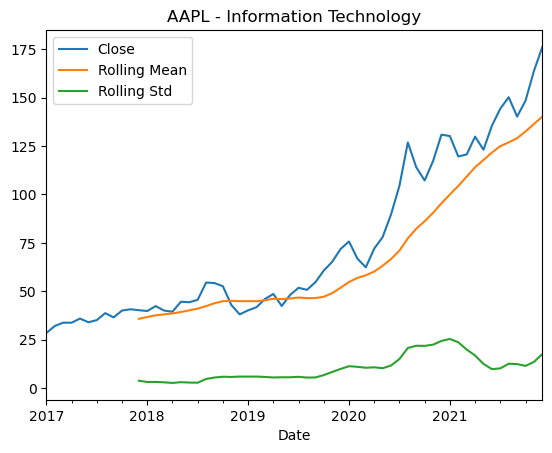

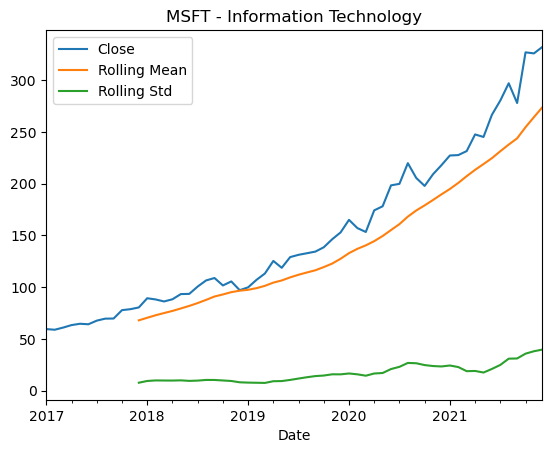

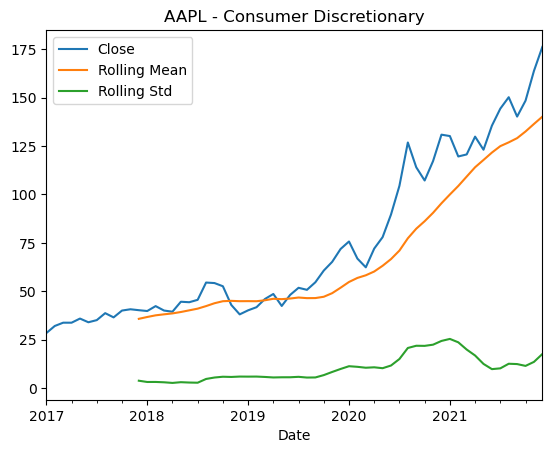

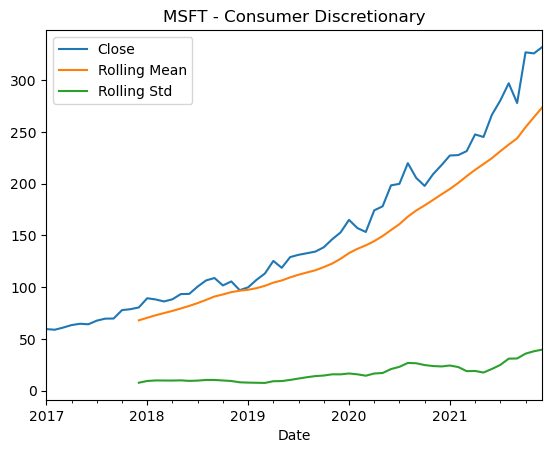

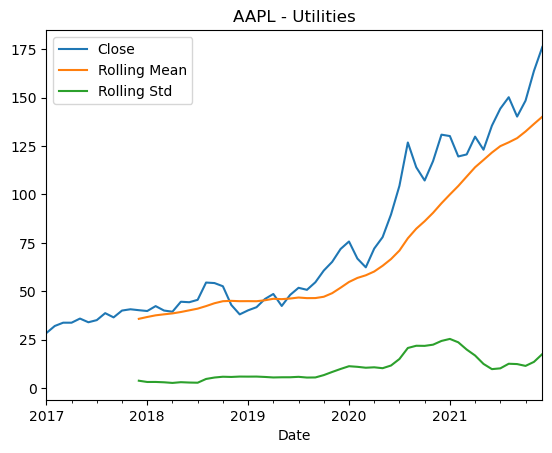

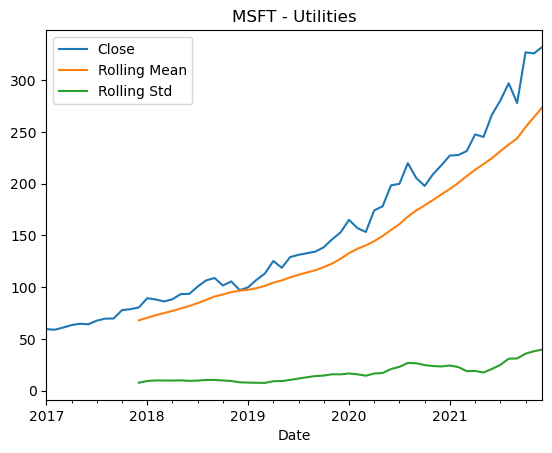

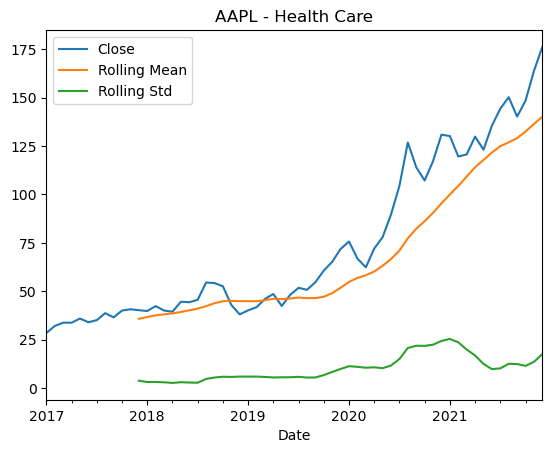

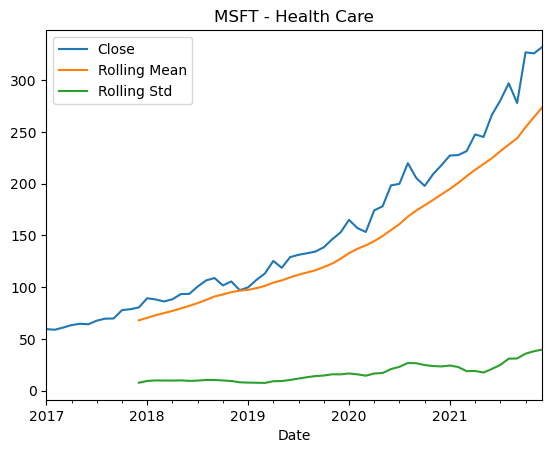

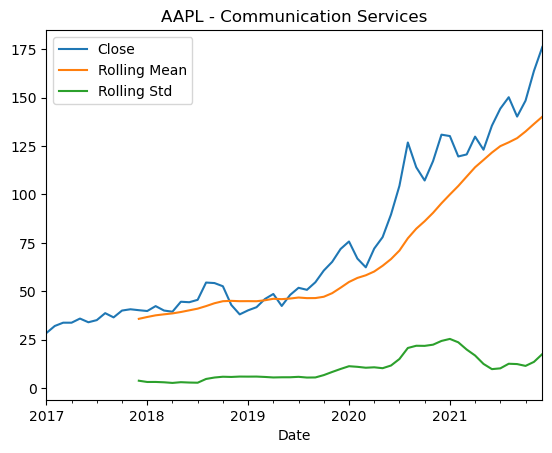

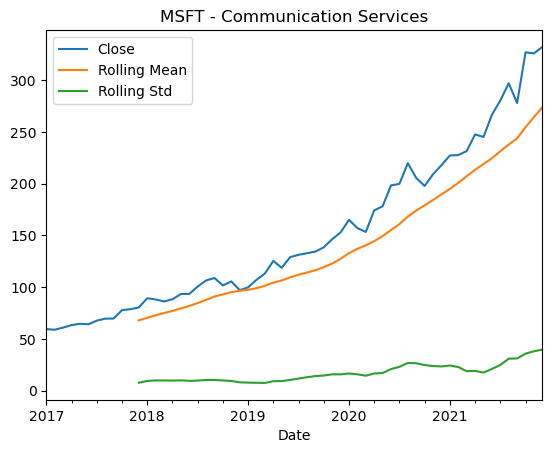

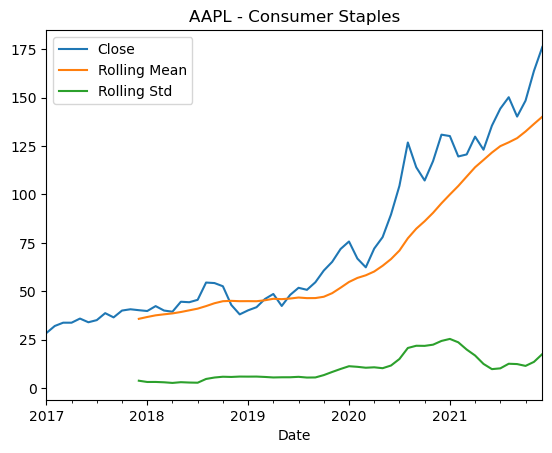

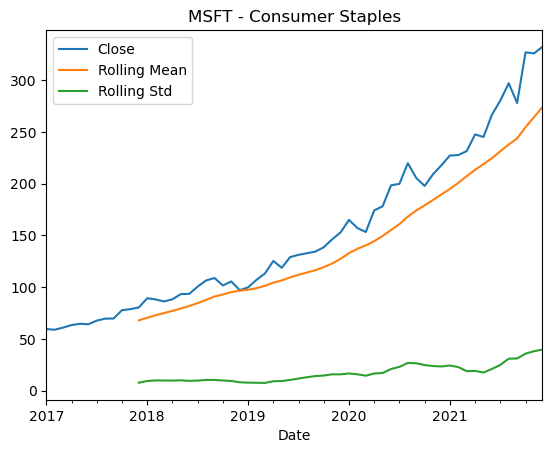

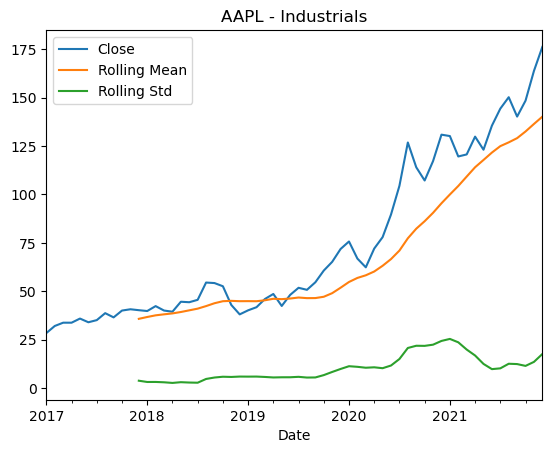

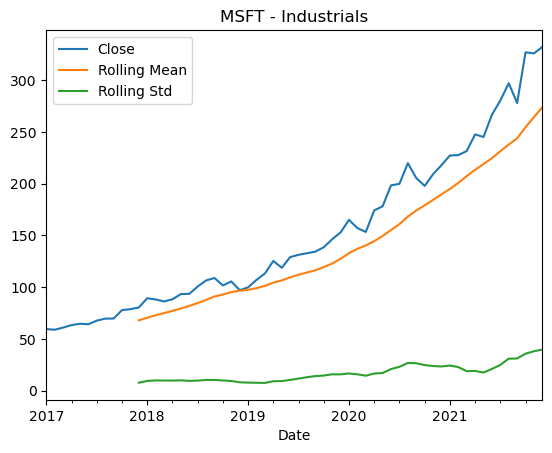

In [133]:
start_date = '2017-01-01'
end_date = '2022-01-01'
for sector in top_companies.keys():
    for company in top_companies[sector]:
        ticker = yf.Ticker(company)
        data1 = ticker.history(start=start_date, end=end_date, interval='1mo')
        data1['Rolling Mean'] = data1['Close'].rolling(window=12).mean()
        data1['Rolling Std'] = data1['Close'].rolling(window=12).std()
        data1.plot(y=['Close', 'Rolling Mean', 'Rolling Std'], title=f'{company} - {sector}')

In [134]:
for sector in top_companies.keys():
    for company in top_companies[sector]:
        ticker = yf.Ticker(company)
        data = ticker.history(start=start_date, end=end_date, interval='1mo')
        result = adfuller(data['Close'])
        print(f'{company} - {sector}: ADF Statistic: {result[0]}, p-value: {result[1]}')

AAPL - Information Technology: ADF Statistic: 1.762568014599153, p-value: 0.998271814381589
MSFT - Information Technology: ADF Statistic: 3.0046896107884735, p-value: 1.0
AAPL - Consumer Discretionary: ADF Statistic: 1.762567686211993, p-value: 0.998271813677654
MSFT - Consumer Discretionary: ADF Statistic: 3.0046968205527285, p-value: 1.0
AAPL - Utilities: ADF Statistic: 1.7625682843224129, p-value: 0.9982718149597709
MSFT - Utilities: ADF Statistic: 3.0046949288131226, p-value: 1.0
AAPL - Health Care: ADF Statistic: 1.762568041004364, p-value: 0.9982718144381915
MSFT - Health Care: ADF Statistic: 3.0046968205527285, p-value: 1.0
AAPL - Communication Services: ADF Statistic: 1.7625682843224129, p-value: 0.9982718149597709
MSFT - Communication Services: ADF Statistic: 3.0046907598211776, p-value: 1.0
AAPL - Consumer Staples: ADF Statistic: 1.762568041004364, p-value: 0.9982718144381915
MSFT - Consumer Staples: ADF Statistic: 3.0046907598211776, p-value: 1.0
AAPL - Industrials: ADF Stat

The p-value is greater than 0.05, so the time series is non-stationary.

In [135]:
import pmdarima as pm

In [136]:
auto_arima = pm.auto_arima(train_data,stepwise=False,seasonal=False)

In [137]:
auto_arima

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [138]:
forecast_test_auto = auto_arima.predict(n_periods=len(test_data))

In [139]:
print(auto_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -568.844
Date:                Thu, 06 Apr 2023   AIC                           1147.688
Time:                        17:53:25   BIC                           1159.722
Sample:                             0   HQIC                          1152.519
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.003    299.177      0.000       0.993       1.006
ma.L1         -1.0252      0.281     -3.653      0.000      -1.575      -0.475
ma.L2       3.349e-05      0.397   8.44e-05      1.0

In [140]:
df['forecast_auto'] = [None]*len(train_data) + list(forecast_test_auto)

<AxesSubplot:>

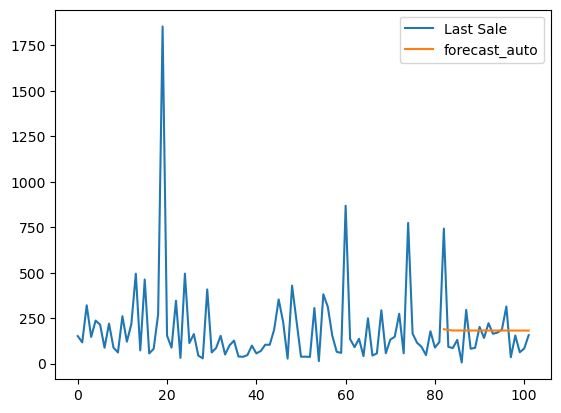

In [141]:
df[['Last Sale','forecast_auto']].plot()

In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [143]:
mae = mean_absolute_error(test_data,forecast_test_auto)
mape = mean_absolute_percentage_error(test_data,forecast_test_auto)
rmse = np.sqrt(mean_squared_error(test_data,forecast_test_auto))

In [144]:
print('MAE :',mae)
print('MAPE :',mape)
print('RMSE :',rmse)

MAE : 98.19368097347453
MAPE : 2.1414538674177597
RMSE : 151.35671702950643
